In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import scipy.stats as stats

from warnings import filterwarnings
filterwarnings("ignore")

In [7]:
df = pd.read_excel("Company_Data2015-1.xlsx")

In [8]:
df.head()

Co_Code          Co_Name  Networth Next Year  Equity Paid Up  Networth  \
0    16974      Hind.Cables            -8021.60          419.36  -7027.48   
1    21214  Tata Tele. Mah.            -3986.19         1954.93  -2968.08   
2    14852     ABG Shipyard            -3192.58           53.84    506.86   
3     2439              GTL            -3054.51          157.30   -623.49   
4    23505  Bharati Defence            -2967.36           50.30  -1070.83   

   Capital Employed  Total Debt  Gross Block   Net Working Capital   \
0          -1007.24     5936.03        474.30              -1076.34   
1           4458.20     7410.18       9070.86              -1098.88   
2           7714.68     6944.54       1281.54               4496.25   
3           2353.88     2326.05       1033.69              -2612.42   
4           4675.33     5740.90       1084.20               1836.23   

   Current Assets   ...  PBIDTM (%)[Latest]  PBITM (%)[Latest]  \
0            40.50  ...                0.00               0.00   
1           486.86  ...              -10.30             -39.74   
2          9097.64  ...            -5279.14           -5516.98   
3          1034.12  ...               -3.33              -7.21   
4          4685.81  ...             -295.55            -400.55   

   PBDTM (%)[Latest]  CPM (%)[Latest]  APATM (%)[Latest]  \
0               0.00             0.00               0.00   
1             -57.74           -57.74             -87.18   
2           -7780.25         -7723.67           -7961.51   
3             -48.13           -47.70             -51.58   
4            -845.88           379.79             274.79   

   Debtors Velocity (Days)  Creditors Velocity (Days)  \
0                        0                          0   
1                       29                        101   
2                       97                        558   
3                       93                         63   
4                     3887                        346   

   Inventory Velocity (Days)  Value of Output/Total Assets  \
0                       45.0                          0.00   
1                        2.0                          0.31   
2                        0.0                         -0.03   
3                        2.0                          0.24   
4                        0.0                          0.01   

   Value of Output/Gross Block  
0                         0.00  
1                         0.24  
2                        -0.26  
3                         1.90  
4                         0.05  

[5 rows x 67 columns]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3586 entries, 0 to 3585
Data columns (total 67 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Co_Code                              3586 non-null   int64  
 1   Co_Name                              3586 non-null   object 
 2   Networth Next Year                   3586 non-null   float64
 3   Equity Paid Up                       3586 non-null   float64
 4   Networth                             3586 non-null   float64
 5   Capital Employed                     3586 non-null   float64
 6   Total Debt                           3586 non-null   float64
 7   Gross Block                          3586 non-null   float64
 8   Net Working Capital                  3586 non-null   float64
 9   Current Assets                       3586 non-null   float64
 10  Current Liabilities and Provisions   3586 non-null   float64
 11  Total Assets/Liabilities      

In [10]:
df.columns

Index(['Co_Code', 'Co_Name', 'Networth Next Year', 'Equity Paid Up',
       'Networth', 'Capital Employed', 'Total Debt', 'Gross Block ',
       'Net Working Capital ', 'Current Assets ',
       'Current Liabilities and Provisions ', 'Total Assets/Liabilities ',
       'Gross Sales', 'Net Sales', 'Other Income', 'Value Of Output',
       'Cost of Production', 'Selling Cost', 'PBIDT', 'PBDT', 'PBIT', 'PBT',
       'PAT', 'Adjusted PAT', 'CP', 'Revenue earnings in forex',
       'Revenue expenses in forex', 'Capital expenses in forex',
       'Book Value (Unit Curr)', 'Book Value (Adj.) (Unit Curr)',
       'Market Capitalisation', 'CEPS (annualised) (Unit Curr)',
       'Cash Flow From Operating Activities',
       'Cash Flow From Investing Activities',
       'Cash Flow From Financing Activities', 'ROG-Net Worth (%)',
       'ROG-Capital Employed (%)', 'ROG-Gross Block (%)',
       'ROG-Gross Sales (%)', 'ROG-Net Sales (%)',
       'ROG-Cost of Production (%)', 'ROG-Total Assets (%)', 

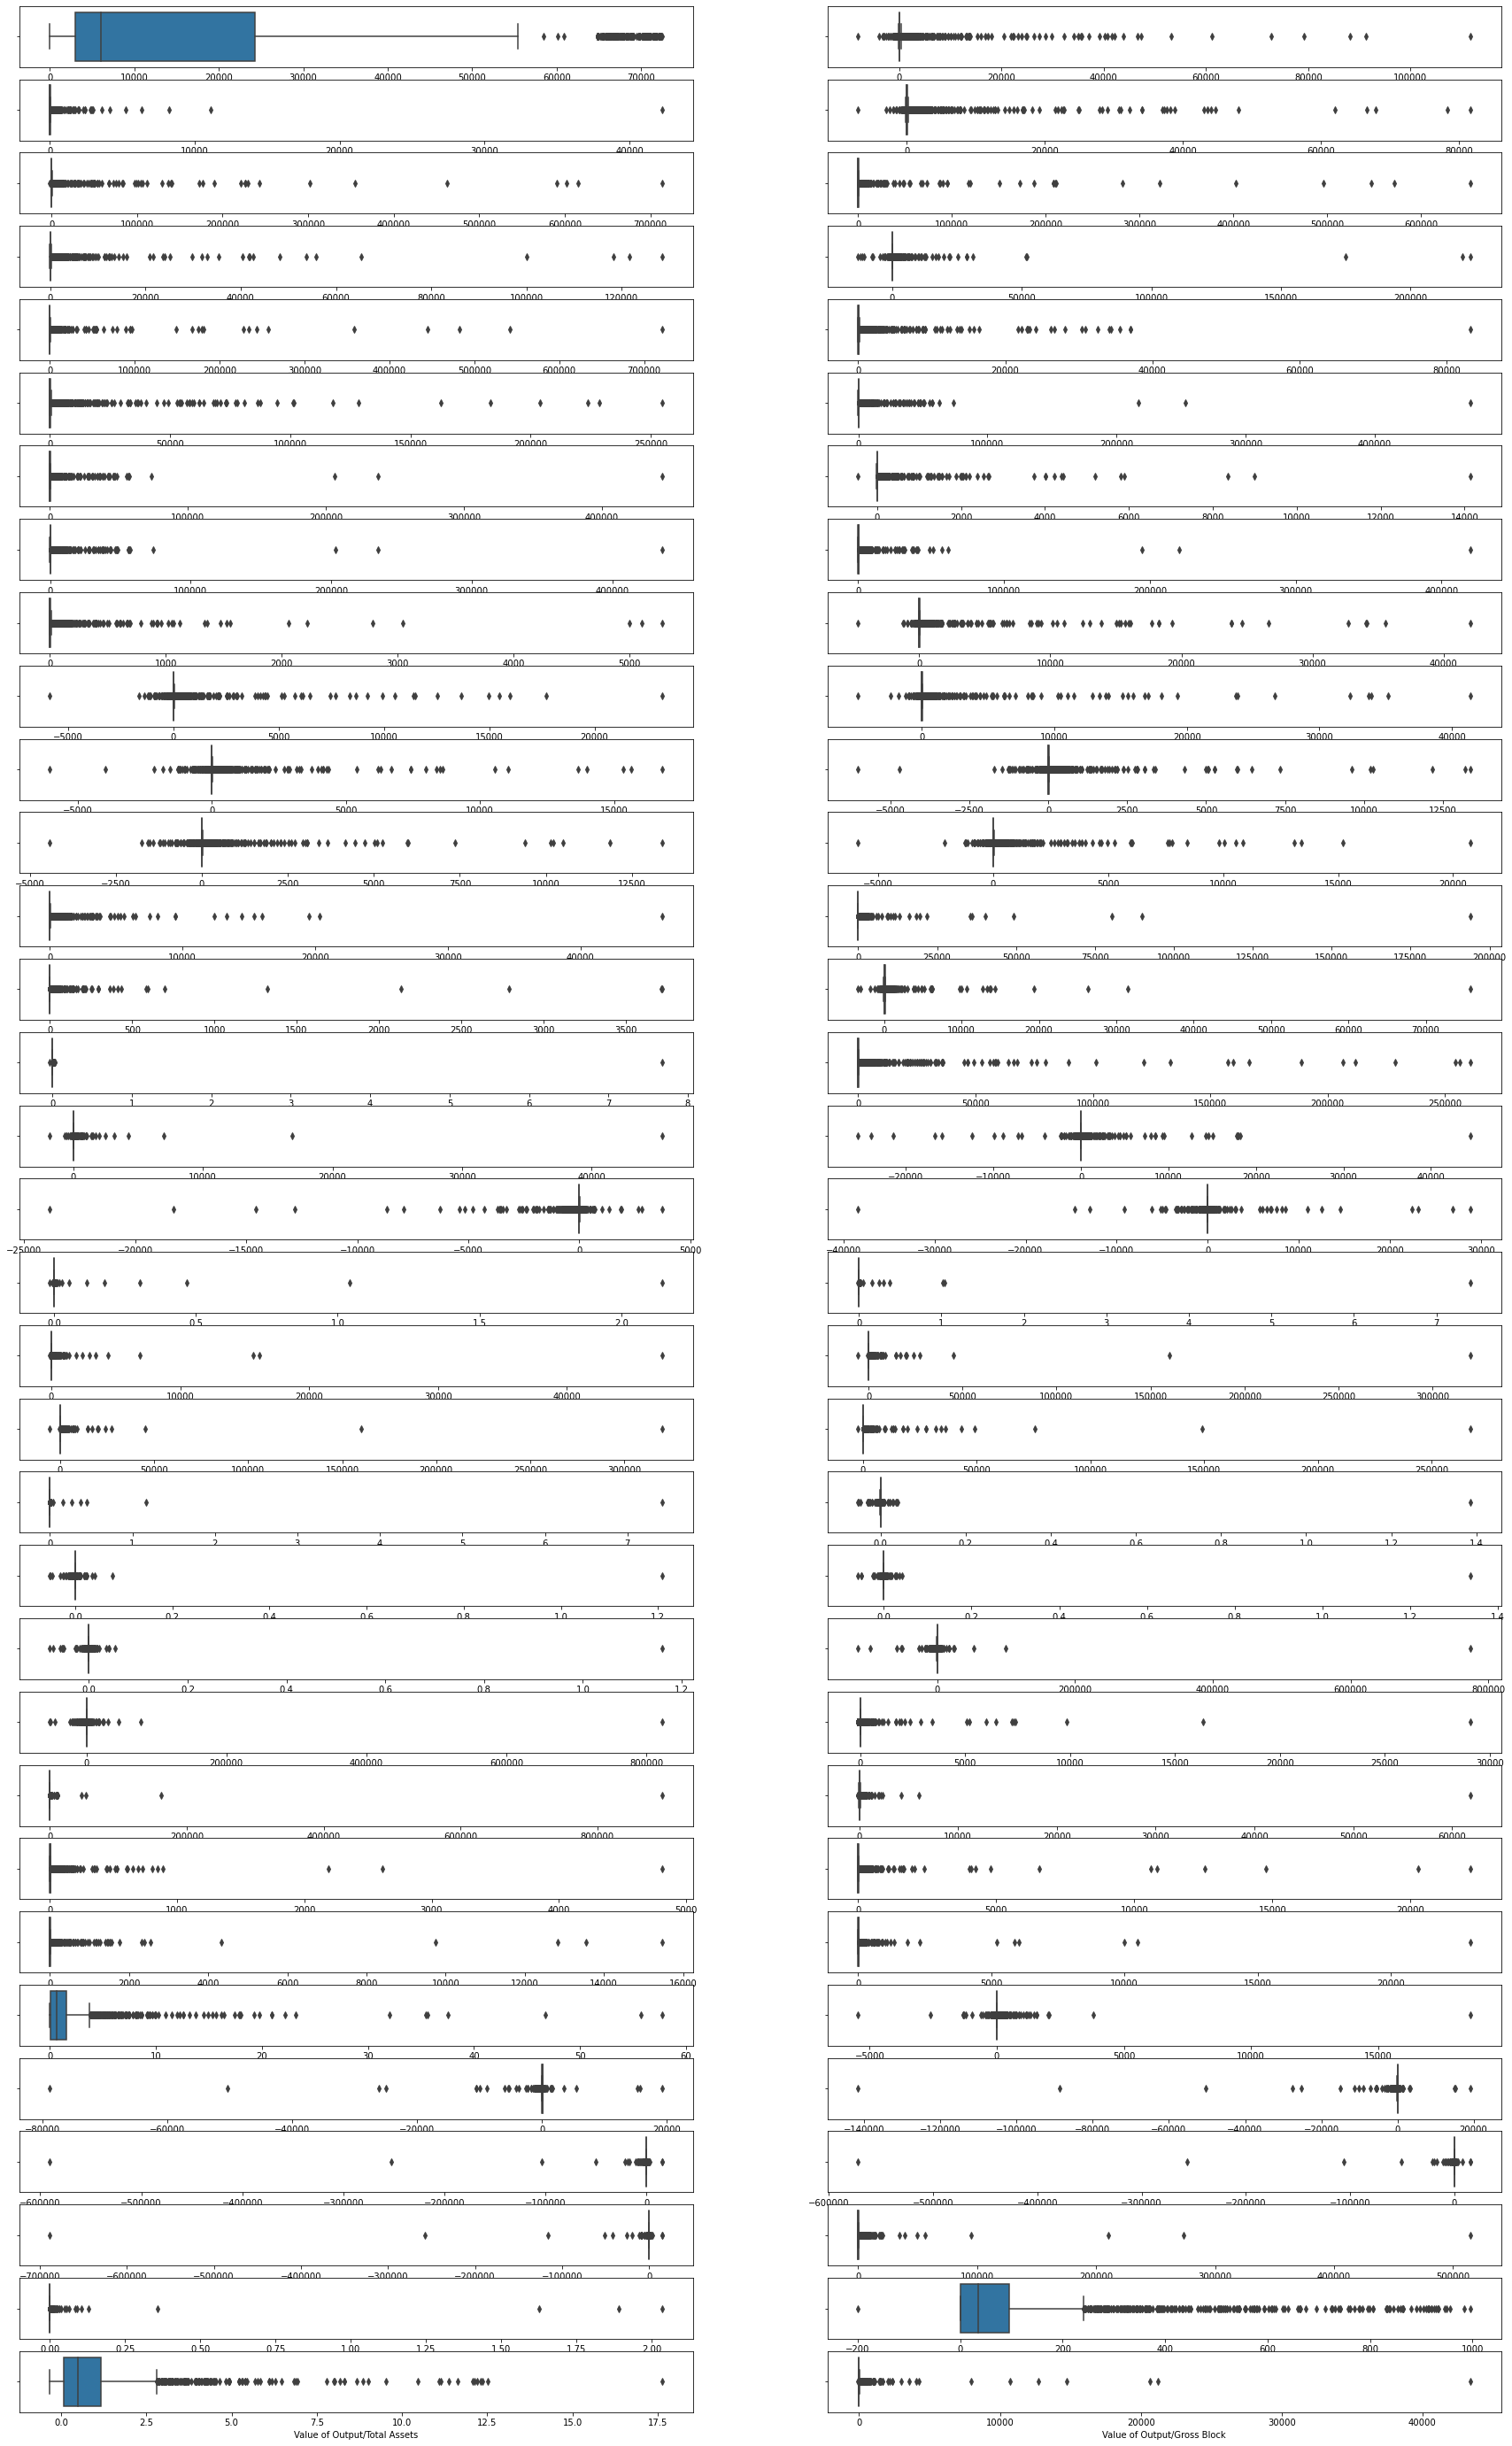

In [11]:
plt.figure(figsize=(30,50))

My_coulmns = ['Co_Code', 'Networth Next Year', 'Equity Paid Up',
       'Networth', 'Capital Employed', 'Total Debt', 'Gross Block ',
       'Net Working Capital ', 'Current Assets ',
       'Current Liabilities and Provisions ', 'Total Assets/Liabilities ',
       'Gross Sales', 'Net Sales', 'Other Income', 'Value Of Output',
       'Cost of Production', 'Selling Cost', 'PBIDT', 'PBDT', 'PBIT', 'PBT',
       'PAT', 'Adjusted PAT', 'CP', 'Revenue earnings in forex',
       'Revenue expenses in forex', 'Capital expenses in forex',
       'Book Value (Unit Curr)', 'Book Value (Adj.) (Unit Curr)',
       'Market Capitalisation', 'CEPS (annualised) (Unit Curr)',
       'Cash Flow From Operating Activities',
       'Cash Flow From Investing Activities',
       'Cash Flow From Financing Activities', 'ROG-Net Worth (%)',
       'ROG-Capital Employed (%)', 'ROG-Gross Block (%)',
       'ROG-Gross Sales (%)', 'ROG-Net Sales (%)',
       'ROG-Cost of Production (%)', 'ROG-Total Assets (%)', 'ROG-PBIDT (%)',
       'ROG-PBDT (%)', 'ROG-PBIT (%)', 'ROG-PBT (%)', 'ROG-PAT (%)',
       'ROG-CP (%)', 'ROG-Revenue earnings in forex (%)',
       'ROG-Revenue expenses in forex (%)', 'ROG-Market Capitalisation (%)',
       'Current Ratio[Latest]', 'Fixed Assets Ratio[Latest]',
       'Inventory Ratio[Latest]', 'Debtors Ratio[Latest]',
       'Total Asset Turnover Ratio[Latest]', 'Interest Cover Ratio[Latest]',
       'PBIDTM (%)[Latest]', 'PBITM (%)[Latest]', 'PBDTM (%)[Latest]',
       'CPM (%)[Latest]', 'APATM (%)[Latest]', 'Debtors Velocity (Days)',
       'Creditors Velocity (Days)', 'Inventory Velocity (Days)',
       'Value of Output/Total Assets', 'Value of Output/Gross Block']
for i in range(0,66):
    plt.subplot(33,2,i+1)
    sns.boxplot(df[My_coulmns[i]])

In [12]:
Default_X = df.drop('Networth Next Year', axis = 1)
Default_nostring = Default_X.drop('Co_Name', axis = 1)
Default_Y = df['Networth Next Year']
Default_Z = df['Co_Name']

In [13]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [14]:
for column in Default_nostring.columns:
    lr,ur=remove_outlier(df[column])
    Default_nostring[column]=np.where(Default_nostring[column]>ur,ur,Default_nostring[column])
    Default_nostring[column]=np.where(Default_nostring[column]<lr,lr,Default_nostring[column])

In [15]:
df.isnull().sum().sum()

118

In [16]:
A = Default_nostring.fillna(Default_nostring.median())

In [17]:
df['Networth Next Year'].isnull().sum() 

0

In [18]:
Default = pd.concat([A, Default_Y], axis = 1)

In [19]:
Default.isnull().sum().sum()

0

In [20]:
for i in Default['Networth Next Year']:
    if i>0:
        Default ['default'] = 0
        
    else:
        Default ['default'] = 1

In [21]:
Default.head()

Co_Code  Equity Paid Up  Networth  Capital Employed  Total Debt  \
0  16974.0        43.16875  -166.215        -320.90125      180.83   
1  21214.0        43.16875  -166.215         555.10875      180.83   
2  14852.0        43.16875   287.405         555.10875      180.83   
3   2439.0        43.16875  -166.215         555.10875      180.83   
4  23505.0        43.16875  -166.215         555.10875      180.83   

   Gross Block   Net Working Capital   Current Assets   \
0      328.8825             -89.40625         40.50000   
1      328.8825             -89.40625        332.19375   
2      328.8825             151.52375        332.19375   
3      328.8825             -89.40625        332.19375   
4      328.8825             151.52375        332.19375   

   Current Liabilities and Provisions   Total Assets/Liabilities   ...  \
0                            163.02625                   109.6000  ...   
1                            163.02625                   760.5175  ...   
2                            163.02625                   760.5175  ...   
3                            163.02625                   760.5175  ...   
4                            163.02625                   760.5175  ...   

   PBDTM (%)[Latest]  CPM (%)[Latest]  APATM (%)[Latest]  \
0               0.00             0.00               0.00   
1             -57.74           -57.74             -87.18   
2           -7780.25         -7723.67           -7961.51   
3             -48.13           -47.70             -51.58   
4            -845.88           379.79             274.79   

   Debtors Velocity (Days)  Creditors Velocity (Days)  \
0                      0.0                        0.0   
1                     29.0                      101.0   
2                     97.0                      210.5   
3                     93.0                       63.0   
4                    253.0                      210.5   

   Inventory Velocity (Days)  Value of Output/Total Assets  \
0                       45.0                          0.00   
1                        2.0                          0.31   
2                        0.0                         -0.03   
3                        2.0                          0.24   
4                        0.0                          0.01   

   Value of Output/Gross Block  Networth Next Year  default  
0                         0.00            -8021.60        0  
1                         0.24            -3986.19        0  
2                        -0.26            -3192.58        0  
3                         1.90            -3054.51        0  
4                         0.05            -2967.36        0  

[5 rows x 67 columns]

In [22]:
Default.describe()

Co_Code  Equity Paid Up     Networth  Capital Employed  \
count   3586.000000     3586.000000  3586.000000       3586.000000   
mean   15036.731909       13.994651    73.691121        152.489564   
std    17147.889164       14.001442   112.937394        207.868131   
min        4.000000        0.000000  -166.215000       -320.901250   
25%     3029.250000        3.750000     3.892500          7.602500   
50%     6077.500000        8.290000    18.580000         39.090000   
75%    24269.500000       19.517500   117.297500        226.605000   
max    56129.875000       43.168750   287.405000        555.108750   

        Total Debt  Gross Block   Net Working Capital   Current Assets   \
count  3586.000000   3586.000000           3586.000000      3586.000000   
mean     47.439152     85.099863             36.800227        91.366022   
std      68.217338    121.230109             59.347261       122.085815   
min      -0.720000    -41.190000            -89.406250        -0.910000   
25%       0.030000      0.570000              0.942500         4.000000   
50%       7.490000     15.870000             10.145000        24.540000   
75%      72.350000    131.895000             61.175000       135.277500   
max     180.830000    328.882500            151.523750       332.193750   

       Current Liabilities and Provisions   Total Assets/Liabilities   ...  \
count                          3586.000000                3586.000000  ...   
mean                             43.518483                 208.542427  ...   
std                              60.878782                 280.419359  ...   
min                              -0.230000                  -4.510000  ...   
25%                               0.732500                  10.555000  ...   
50%                               9.225000                  52.010000  ...   
75%                              65.650000                 310.540000  ...   
max                             163.026250                 760.517500  ...   

       PBDTM (%)[Latest]  CPM (%)[Latest]  APATM (%)[Latest]  \
count        3586.000000      3586.000000        3586.000000   
mean         -311.482164      -306.918935        -364.953943   
std         10920.070575     10674.661785       12498.309382   
min       -590500.000000   -572000.000000     -688600.000000   
25%             0.000000         0.000000           0.000000   
50%             4.690000         3.890000           1.590000   
75%            14.100000        11.387500           7.407500   
max         15640.000000     15640.000000       15266.670000   

       Debtors Velocity (Days)  Creditors Velocity (Days)  \
count              3586.000000                3586.000000   
mean                 75.286670                  62.440742   
std                  81.861954                  68.144543   
min                   0.000000                   0.000000   
25%                   8.000000                   8.000000   
50%                  49.000000                  39.000000   
75%                 106.000000                  89.000000   
max                 253.000000                 210.500000   

       Inventory Velocity (Days)  Value of Output/Total Assets  \
count                3586.000000                   3586.000000   
mean                   78.362242                      0.730884   
std                   136.057671                      0.774996   
min                  -199.000000                     -0.330000   
25%                     0.000000                      0.070000   
50%                    35.000000                      0.480000   
75%                    93.000000                      1.160000   
max                   996.000000                      2.795000   

       Value of Output/Gross Block  Networth Next Year  default  
count                  3586.000000         3586.000000   3586.0  
mean                      3.356559          725.045251      0.0  
std                       4.101482         4769.681004      0.0  
min             

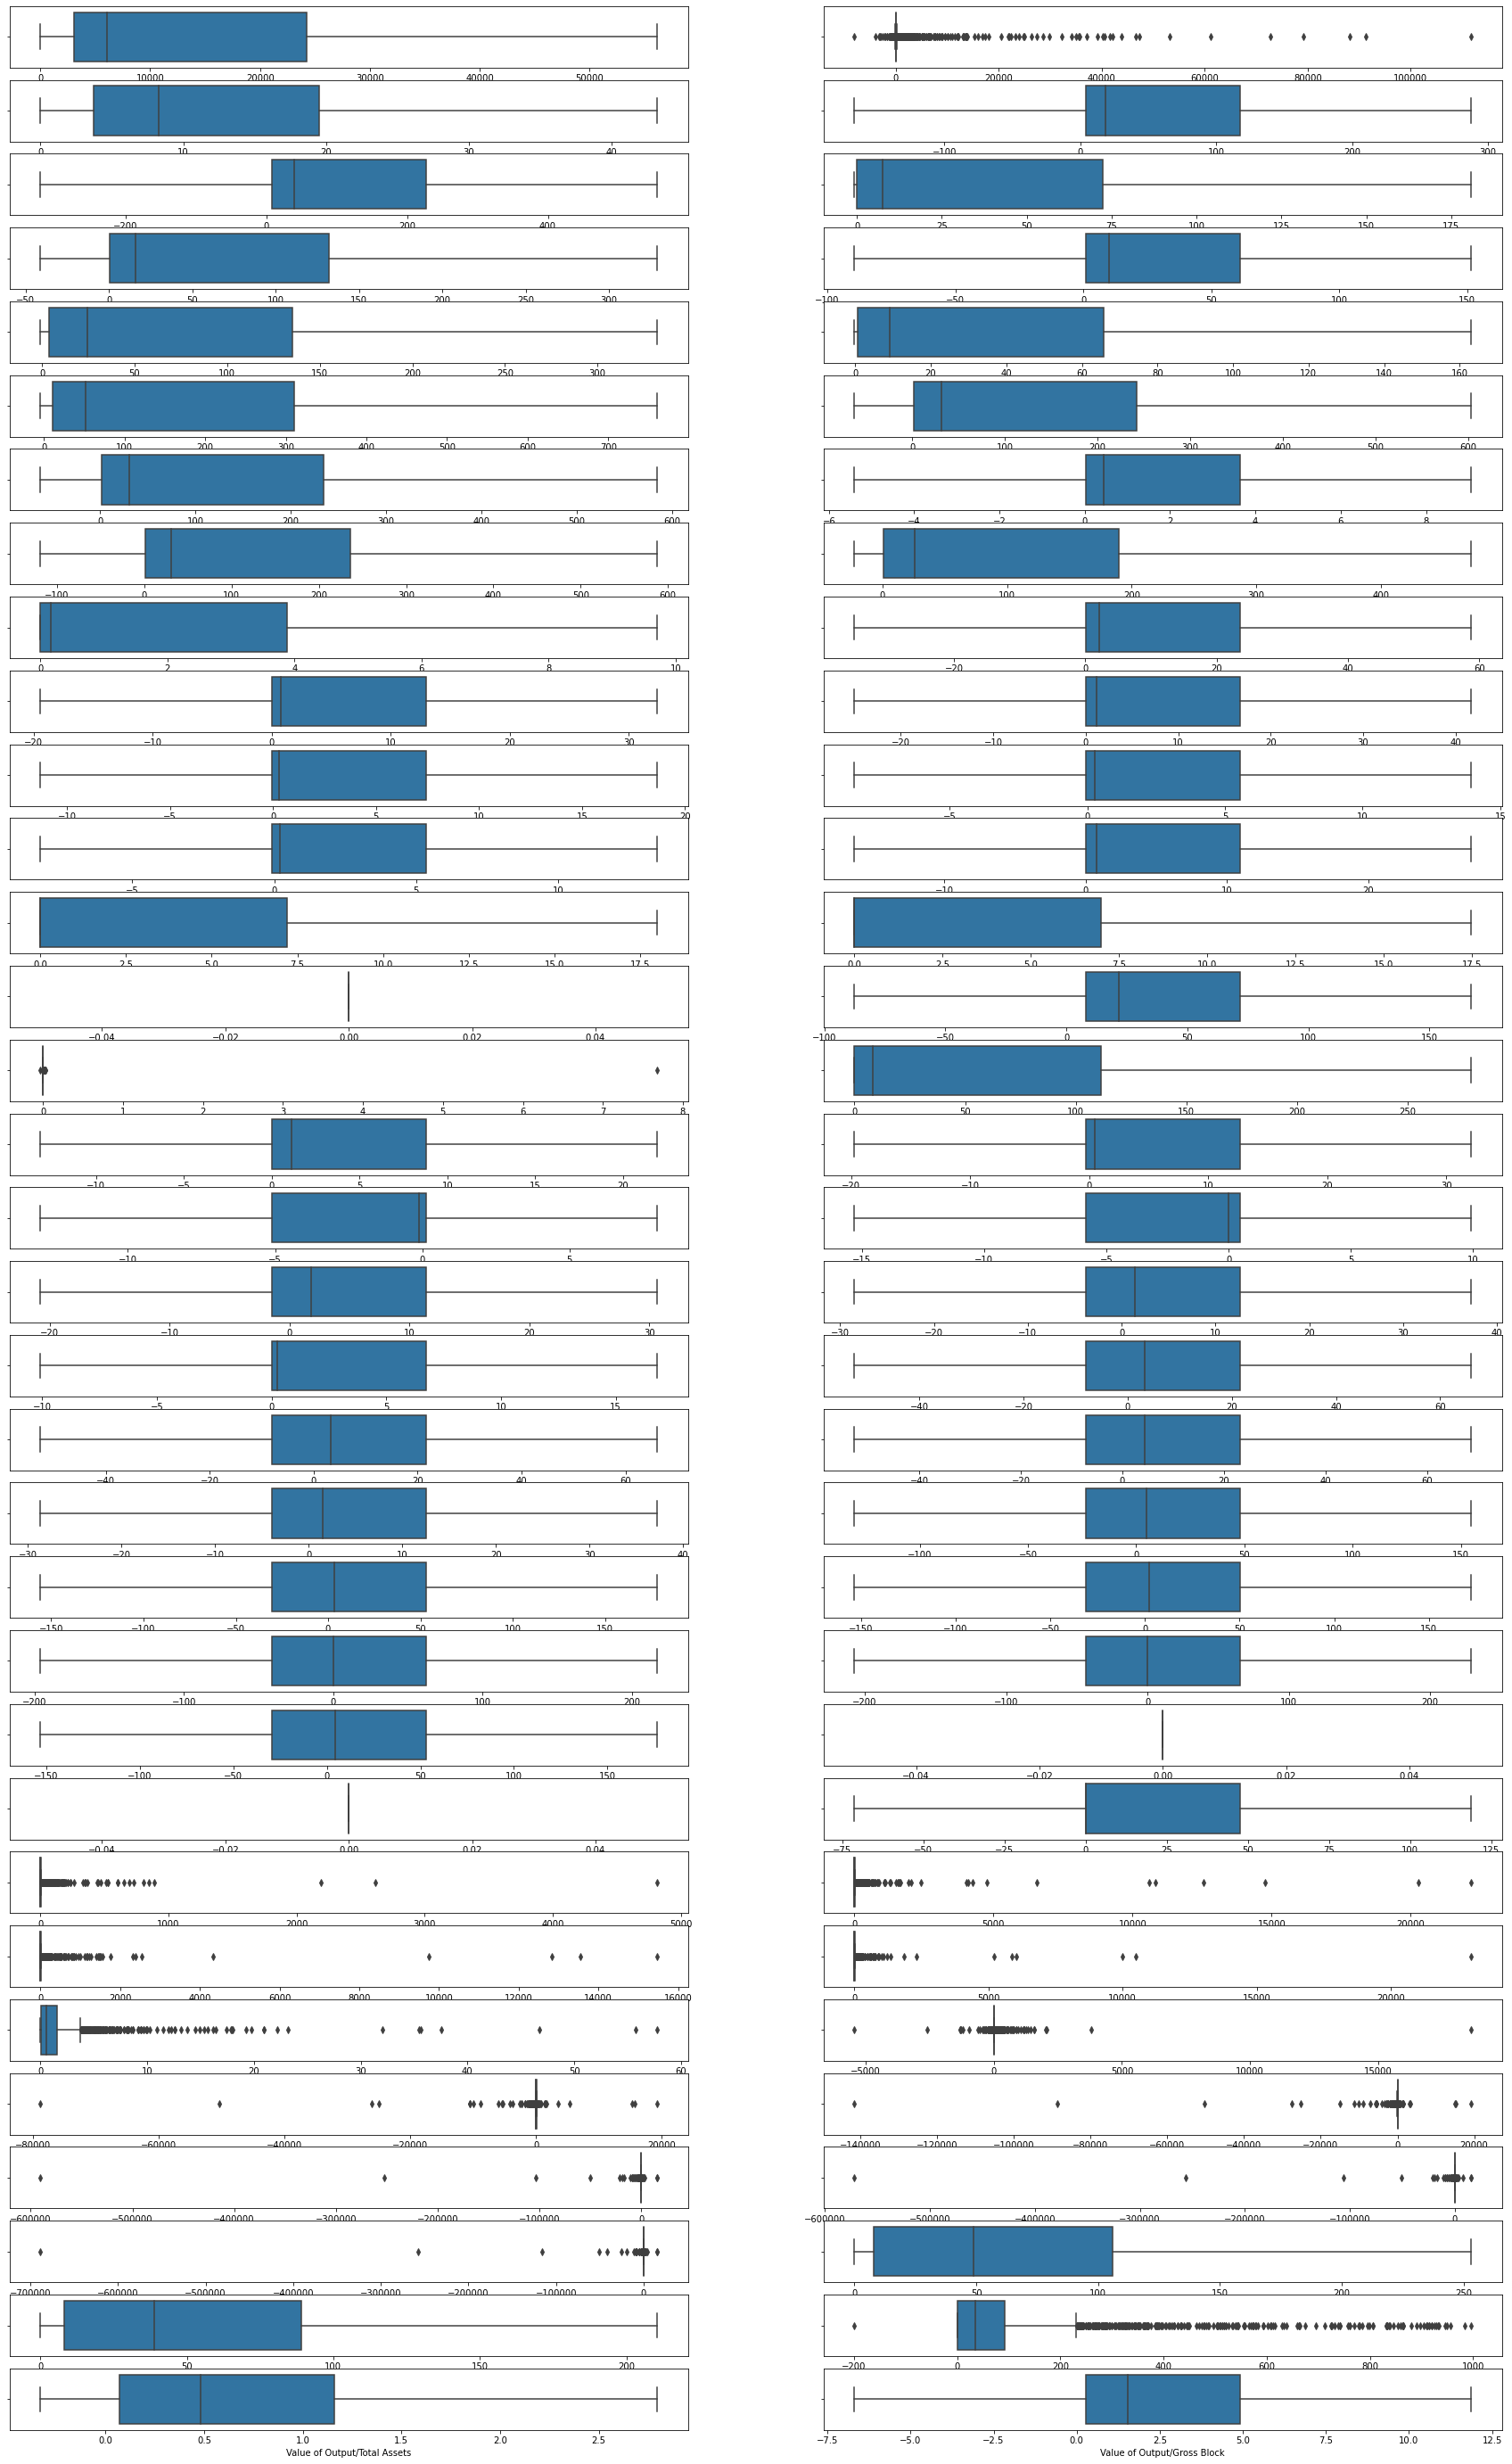

In [23]:
plt.figure(figsize=(30,50))

My_coulmns = ['Co_Code', 'Networth Next Year', 'Equity Paid Up',
       'Networth', 'Capital Employed', 'Total Debt', 'Gross Block ',
       'Net Working Capital ', 'Current Assets ',
       'Current Liabilities and Provisions ', 'Total Assets/Liabilities ',
       'Gross Sales', 'Net Sales', 'Other Income', 'Value Of Output',
       'Cost of Production', 'Selling Cost', 'PBIDT', 'PBDT', 'PBIT', 'PBT',
       'PAT', 'Adjusted PAT', 'CP', 'Revenue earnings in forex',
       'Revenue expenses in forex', 'Capital expenses in forex',
       'Book Value (Unit Curr)', 'Book Value (Adj.) (Unit Curr)',
       'Market Capitalisation', 'CEPS (annualised) (Unit Curr)',
       'Cash Flow From Operating Activities',
       'Cash Flow From Investing Activities',
       'Cash Flow From Financing Activities', 'ROG-Net Worth (%)',
       'ROG-Capital Employed (%)', 'ROG-Gross Block (%)',
       'ROG-Gross Sales (%)', 'ROG-Net Sales (%)',
       'ROG-Cost of Production (%)', 'ROG-Total Assets (%)', 'ROG-PBIDT (%)',
       'ROG-PBDT (%)', 'ROG-PBIT (%)', 'ROG-PBT (%)', 'ROG-PAT (%)',
       'ROG-CP (%)', 'ROG-Revenue earnings in forex (%)',
       'ROG-Revenue expenses in forex (%)', 'ROG-Market Capitalisation (%)',
       'Current Ratio[Latest]', 'Fixed Assets Ratio[Latest]',
       'Inventory Ratio[Latest]', 'Debtors Ratio[Latest]',
       'Total Asset Turnover Ratio[Latest]', 'Interest Cover Ratio[Latest]',
       'PBIDTM (%)[Latest]', 'PBITM (%)[Latest]', 'PBDTM (%)[Latest]',
       'CPM (%)[Latest]', 'APATM (%)[Latest]', 'Debtors Velocity (Days)',
       'Creditors Velocity (Days)', 'Inventory Velocity (Days)',
       'Value of Output/Total Assets', 'Value of Output/Gross Block']
for i in range(0,66):
    plt.subplot(33,2,i+1)
    sns.boxplot(Default[My_coulmns[i]])

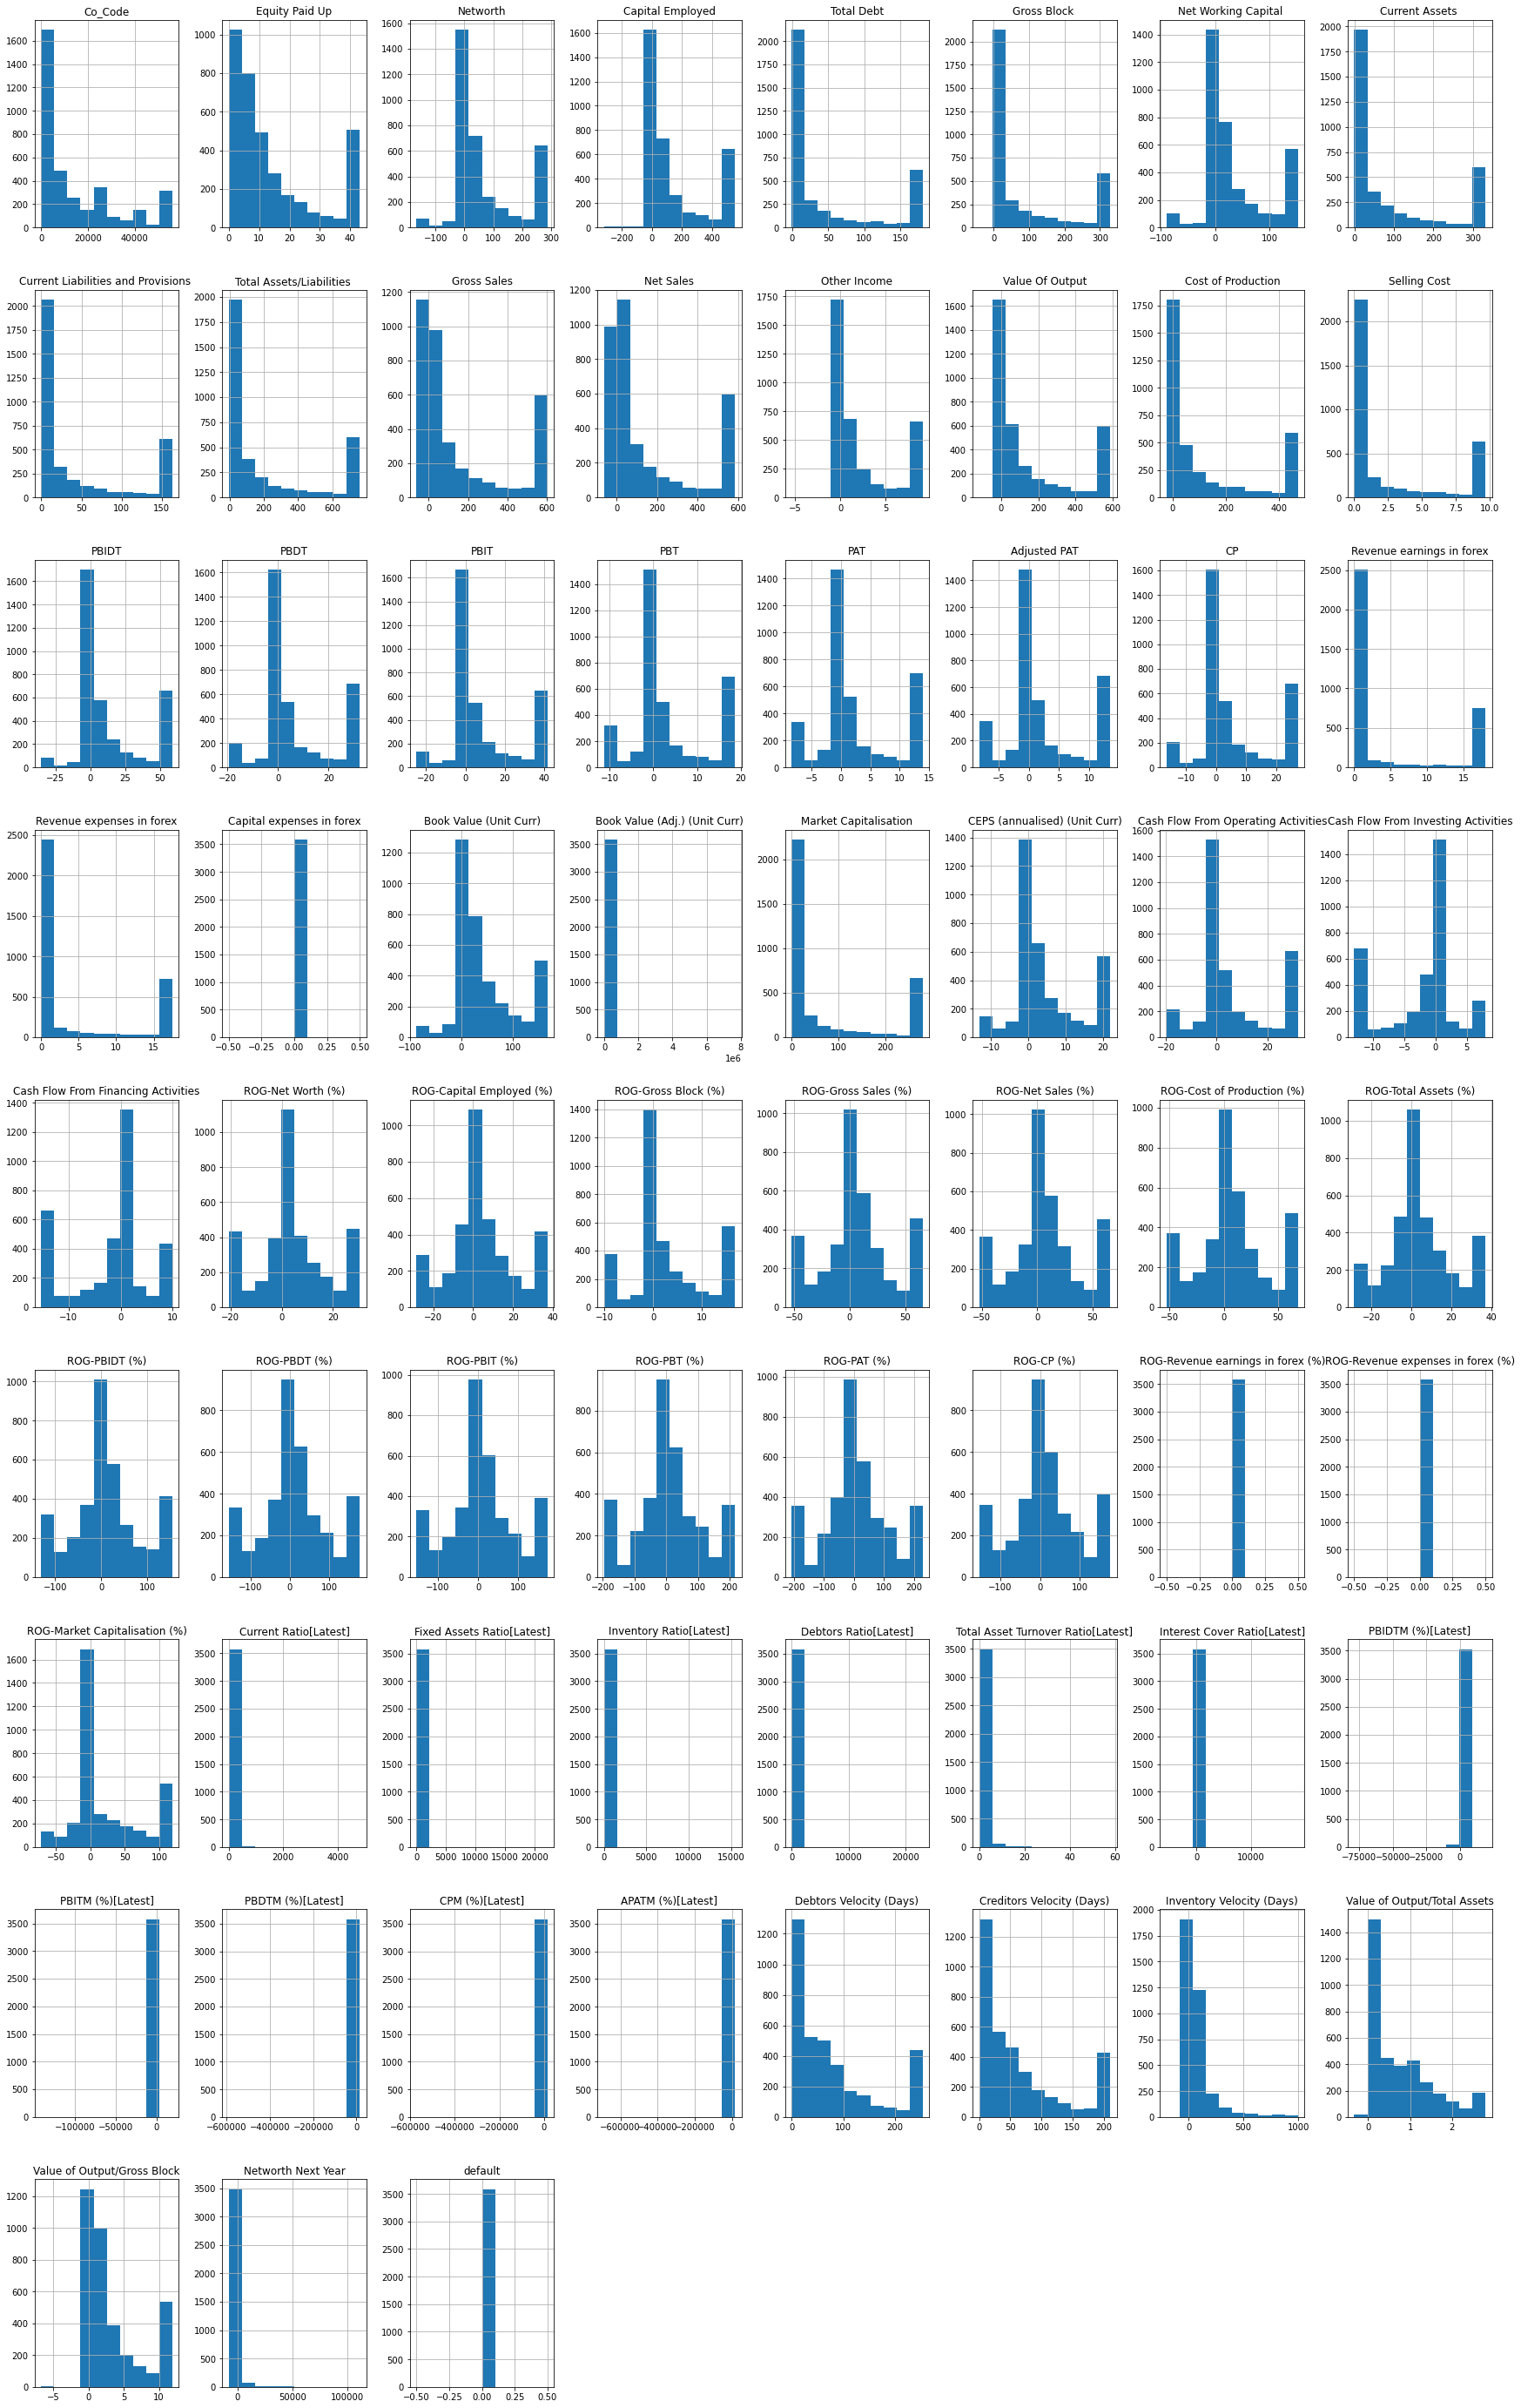

In [24]:
Default.hist(column = Default.columns, figsize=(30,50));

In [ ]:
#sns.pairplot(Default)
#plt.show()

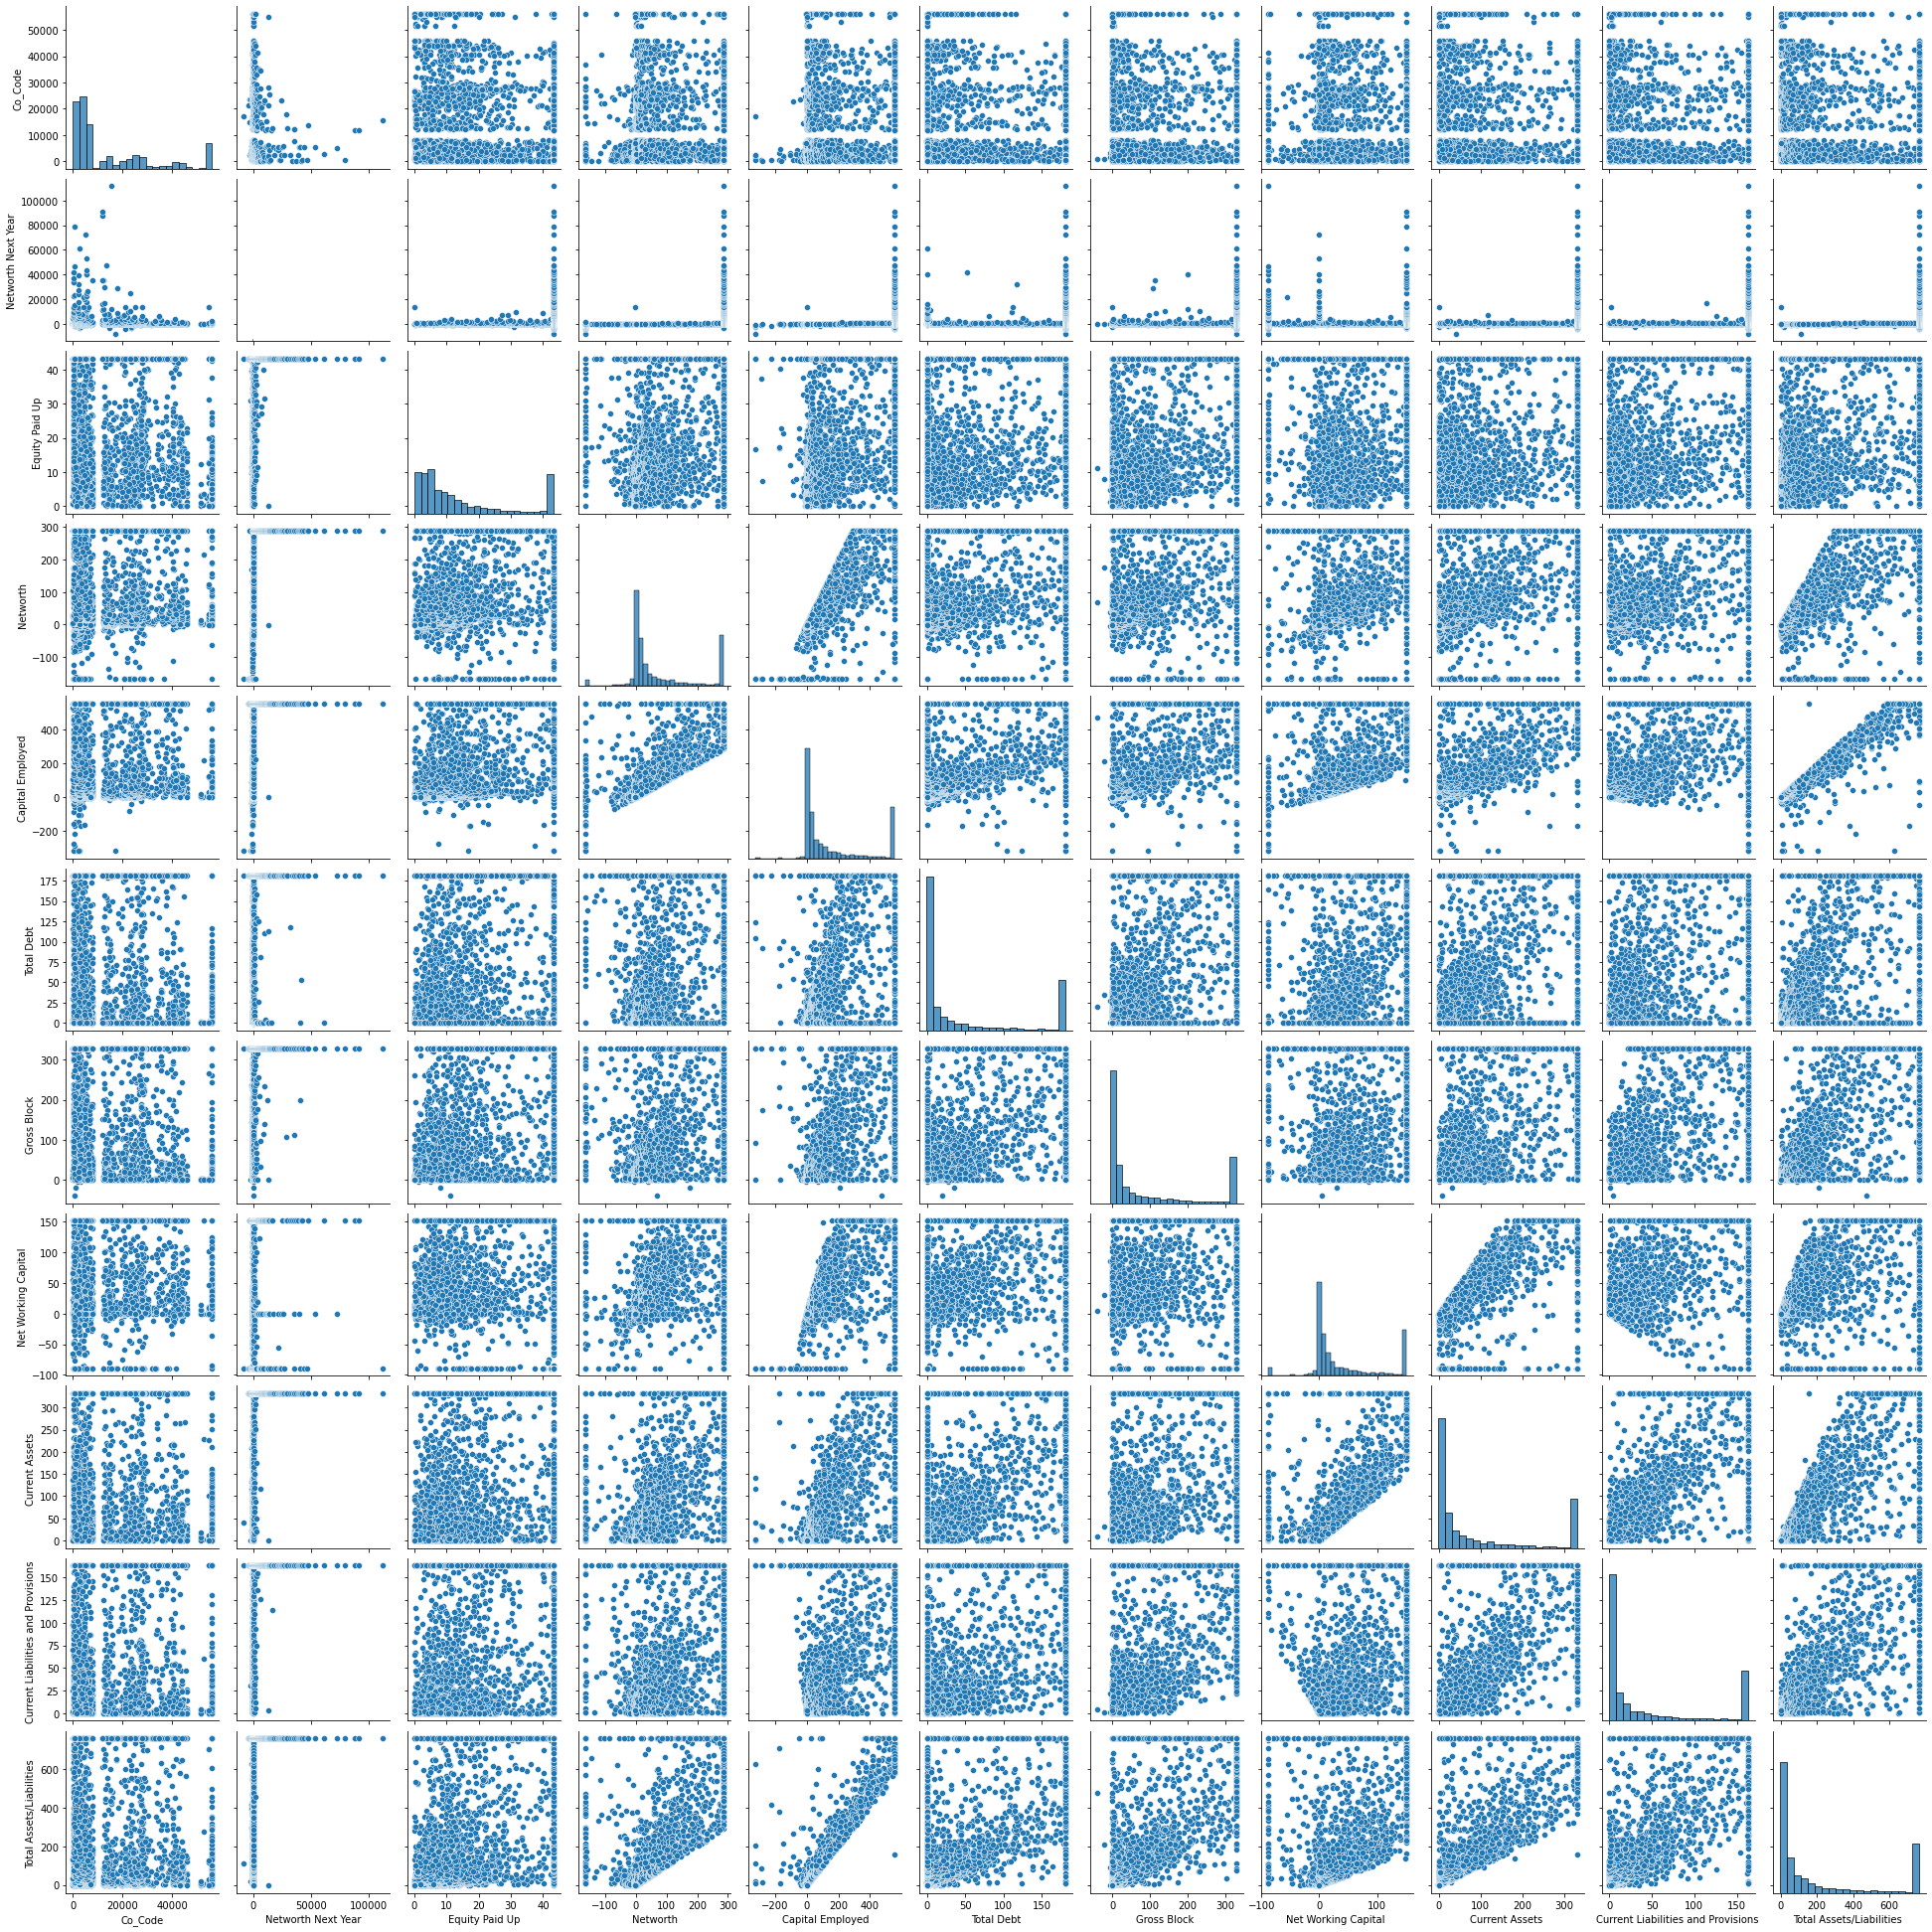

In [25]:
sns.pairplot(Default[['Co_Code', 'Networth Next Year', 'Equity Paid Up','Networth', 'Capital Employed', 'Total Debt', 'Gross Block ',
       'Net Working Capital ', 'Current Assets ',
       'Current Liabilities and Provisions ', 'Total Assets/Liabilities ']]);

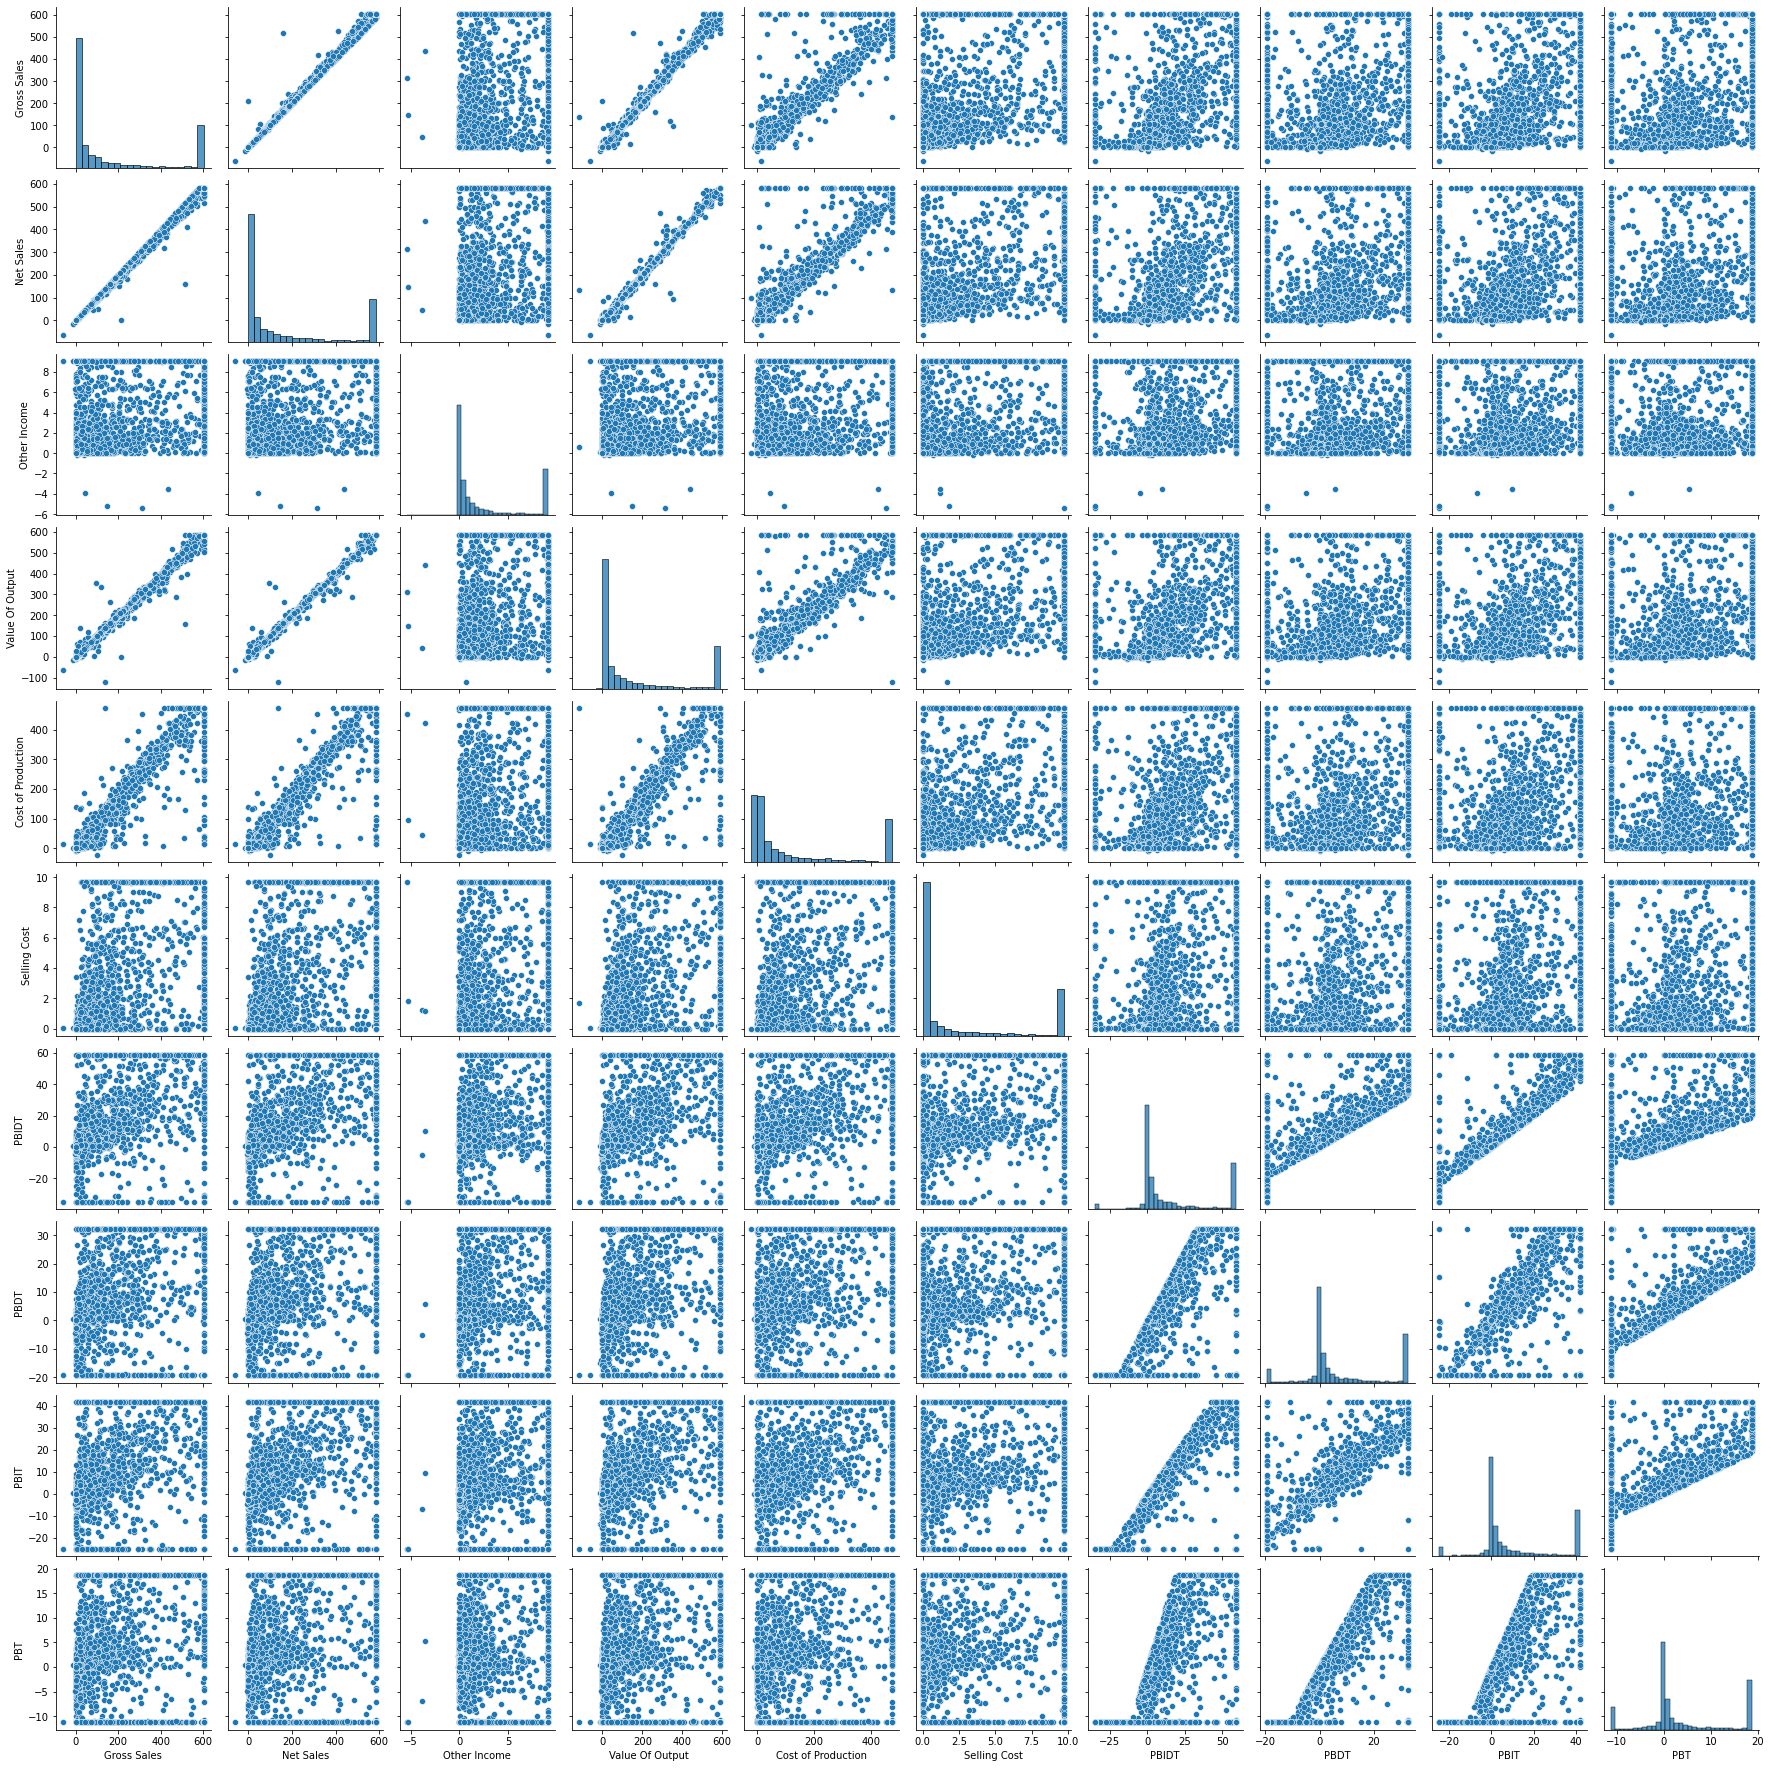

In [26]:
sns.pairplot(Default[['Gross Sales', 'Net Sales', 'Other Income', 'Value Of Output',
       'Cost of Production', 'Selling Cost', 'PBIDT', 'PBDT', 'PBIT', 'PBT']]);

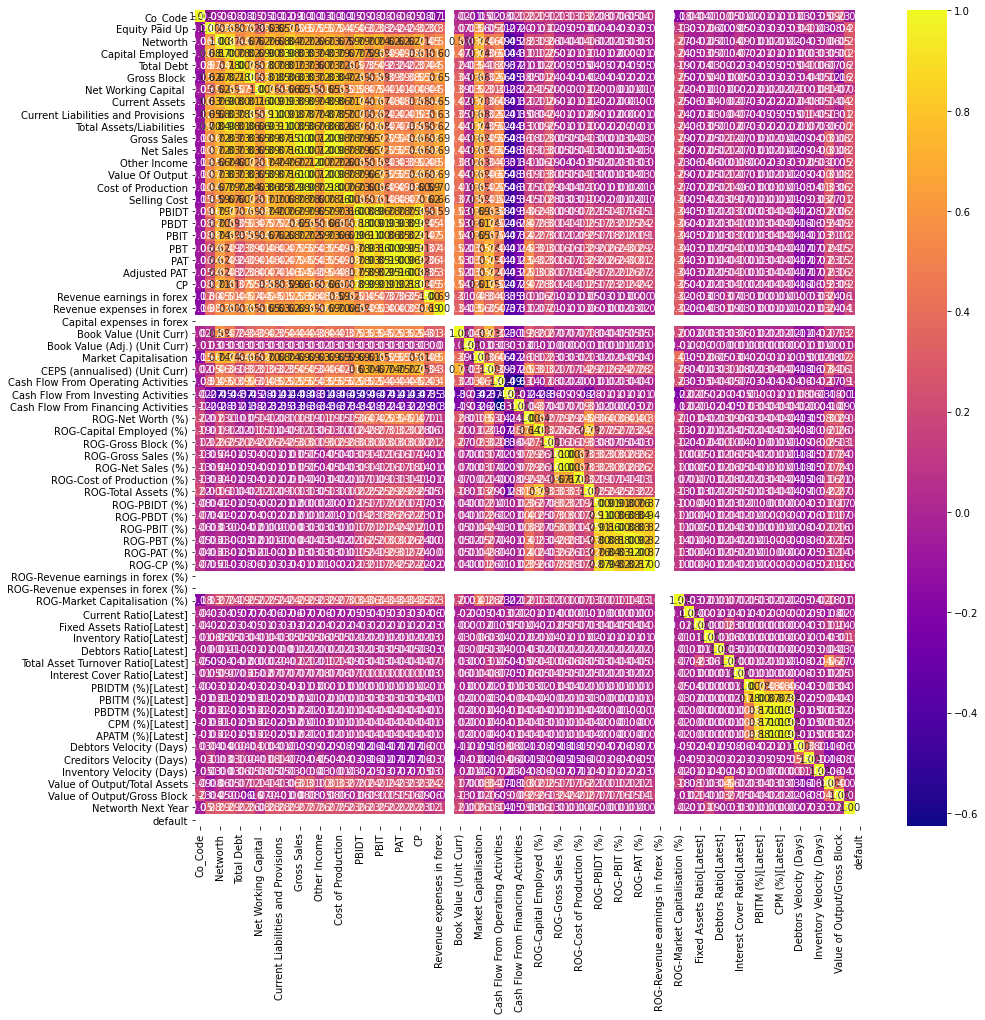

In [20]:
plt.figure(figsize=(15,15))
sns.heatmap(Default.corr(),annot=True,fmt=".2f", cmap='plasma');

In [92]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [93]:
Company = pd.read_excel("Company_Data2015-1.xlsx")

In [94]:
Company.columns = Company.columns.str.strip().str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('%', 'perc').str.replace('/','_by_').str.replace('&','and')

In [95]:
Company.head()

Co_Code          Co_Name  Networth_Next_Year  Equity_Paid_Up  Networth  \
0    16974      Hind.Cables            -8021.60          419.36  -7027.48   
1    21214  Tata Tele. Mah.            -3986.19         1954.93  -2968.08   
2    14852     ABG Shipyard            -3192.58           53.84    506.86   
3     2439              GTL            -3054.51          157.30   -623.49   
4    23505  Bharati Defence            -2967.36           50.30  -1070.83   

   Capital_Employed  Total_Debt  Gross_Block  Net_Working_Capital  \
0          -1007.24     5936.03       474.30             -1076.34   
1           4458.20     7410.18      9070.86             -1098.88   
2           7714.68     6944.54      1281.54              4496.25   
3           2353.88     2326.05      1033.69             -2612.42   
4           4675.33     5740.90      1084.20              1836.23   

   Current_Assets  ...  PBITM_perc_Latest  PBDTM_perc_Latest  CPM_perc_Latest  \
0           40.50  ...               0.00               0.00             0.00   
1          486.86  ...             -39.74             -57.74           -57.74   
2         9097.64  ...           -5516.98           -7780.25         -7723.67   
3         1034.12  ...              -7.21             -48.13           -47.70   
4         4685.81  ...            -400.55            -845.88           379.79   

   APATM_perc_Latest  Debtors_Velocity_Days  Creditors_Velocity_Days  \
0               0.00                      0                        0   
1             -87.18                     29                      101   
2           -7961.51                     97                      558   
3             -51.58                     93                       63   
4             274.79                   3887                      346   

   Inventory_Velocity_Days  Value_of_Output_by_Total_Assets  \
0                     45.0                             0.00   
1                      2.0                             0.31   
2                      0.0                            -0.03   
3                      2.0                             0.24   
4                      0.0                             0.01   

   Value_of_Output_by_Gross_Block  default  
0                            0.00      1.0  
1                            0.24      1.0  
2                           -0.26      1.0  
3                            1.90      1.0  
4                            0.05      1.0  

[5 rows x 68 columns]

In [96]:
print('The number of rows (observations) is',Company.shape[0],'\n''The number of columns (variables) is',Company.shape[1])

The number of rows (observations) is 3586 
The number of columns (variables) is 68


In [97]:
Company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3586 entries, 0 to 3585
Data columns (total 68 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Co_Code                              3586 non-null   int64  
 1   Co_Name                              3586 non-null   object 
 2   Networth_Next_Year                   3586 non-null   float64
 3   Equity_Paid_Up                       3586 non-null   float64
 4   Networth                             3586 non-null   float64
 5   Capital_Employed                     3586 non-null   float64
 6   Total_Debt                           3586 non-null   float64
 7   Gross_Block                          3586 non-null   float64
 8   Net_Working_Capital                  3586 non-null   float64
 9   Current_Assets                       3586 non-null   float64
 10  Current_Liabilities_and_Provisions   3586 non-null   float64
 11  Total_Assets_by_Liabilities   

In [98]:
Company.describe()

Co_Code  Networth_Next_Year  Equity_Paid_Up      Networth  \
count   3586.000000         3586.000000     3586.000000   3586.000000   
mean   16065.388734          725.045251       62.966584    649.746299   
std    19776.817379         4769.681004      778.761744   4091.988792   
min        4.000000        -8021.600000        0.000000  -7027.480000   
25%     3029.250000            3.985000        3.750000      3.892500   
50%     6077.500000           19.015000        8.290000     18.580000   
75%    24269.500000          123.802500       19.517500    117.297500   
max    72493.000000       111729.100000    42263.460000  81657.350000   

       Capital_Employed     Total_Debt    Gross_Block  Net_Working_Capital  \
count       3586.000000    3586.000000    3586.000000          3586.000000   
mean        2799.611054    1994.823779     594.178829           410.809665   
std        26975.135385   23652.842746    4871.547802          6301.218546   
min        -1824.750000      -0.720000     -41.190000        -13162.420000   
25%            7.602500       0.030000       0.570000             0.942500   
50%           39.090000       7.490000      15.870000            10.145000   
75%          226.605000      72.350000     131.895000            61.175000   
max       714001.250000  652823.810000  128477.590000        223257.560000   

       Current_Assets  Current_Liabilities_and_Provisions  ...  \
count     3586.000000                         3586.000000  ...   
mean      1960.349172                          391.992078  ...   
std      22577.570829                         2675.001631  ...   
min         -0.910000                           -0.230000  ...   
25%          4.000000                            0.732500  ...   
50%         24.540000                            9.225000  ...   
75%        135.277500                           65.650000  ...   
max     721166.000000                        83232.980000  ...   

       PBITM_perc_Latest  PBDTM_perc_Latest  CPM_perc_Latest  \
count        3585.000000        3585.000000      3585.000000   
mean         -109.213414        -311.570357      -307.005632   
std          3057.635870       10921.592639     10676.149629   
min       -141600.000000     -590500.000000   -572000.000000   
25%             0.000000           0.000000         0.000000   
50%             5.230000           4.690000         3.890000   
75%            14.290000          14.110000        11.390000   
max         19195.700000       15640.000000     15640.000000   

       APATM_perc_Latest  Debtors_Velocity_Days  Creditors_Velocity_Days  \
count        3585.000000            3586.000000             3.586000e+03   
mean         -365.056187             603.894032             2.057855e+03   
std         12500.051387           10636.759580             5.416948e+04   
min       -688600.000000               0.000000             0.000000e+00   
25%             0.000000               8.000000             8.000000e+00   
50%             1.590000              49.000000             3.900000e+01   
75%             7.410000             106.000000             8.900000e+01   
max         15266.670000          514721.000000             2.034145e+06   

       Inventory_Velocity_Days  Value_of_Output_by_Total_Assets  \
count              3483.000000                      3586.000000   
mean                 79.644559                         0.819757   
std                 137.847792                         1.201400   
min                -199.000000                        -0.330000   
25%                   0.000000                         0.070000   
50%                  35.000000                         0.480000   
75%                  96.000000                         1.160000   
max                 996.000000                        17.630000   

       Value_of_Output_by_Gross_Block     default  
count                     3586.000000  3585.00000  
mean                        61.884548     0.10795  
std                        976.824

In [99]:
Company['default'].value_counts()

0.0    3198
1.0     387
Name: default, dtype: int64

In [100]:
387/(3198+387)

0.10794979079497909

In [101]:
Company['default'].describe()

count    3585.00000
mean        0.10795
std         0.31036
min         0.00000
25%         0.00000
50%         0.00000
75%         0.00000
max         1.00000
Name: default, dtype: float64

In [105]:
Company.isnull().sum().sum()

119

In [107]:
print(np.where(Company.isnull().sum()>0))

(array([29, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 64, 67]),)


In [111]:
new = Company['Co_Name']
new.head()

0        Hind.Cables
1    Tata Tele. Mah.
2       ABG Shipyard
3                GTL
4    Bharati Defence
Name: Co_Name, dtype: object

In [112]:
Company = Company.drop(['Co_Name'], axis = 1)
Company.head()

Co_Code  Networth_Next_Year  Equity_Paid_Up  Networth  Capital_Employed  \
0    16974            -8021.60          419.36  -7027.48          -1007.24   
1    21214            -3986.19         1954.93  -2968.08           4458.20   
2    14852            -3192.58           53.84    506.86           7714.68   
3     2439            -3054.51          157.30   -623.49           2353.88   
4    23505            -2967.36           50.30  -1070.83           4675.33   

   Total_Debt  Gross_Block  Net_Working_Capital  Current_Assets  \
0     5936.03       474.30             -1076.34           40.50   
1     7410.18      9070.86             -1098.88          486.86   
2     6944.54      1281.54              4496.25         9097.64   
3     2326.05      1033.69             -2612.42         1034.12   
4     5740.90      1084.20              1836.23         4685.81   

   Current_Liabilities_and_Provisions  ...  PBITM_perc_Latest  \
0                             1116.85  ...               0.00   
1                             1585.74  ...             -39.74   
2                             4601.39  ...           -5516.98   
3                             3646.54  ...              -7.21   
4                             2849.58  ...            -400.55   

   PBDTM_perc_Latest  CPM_perc_Latest  APATM_perc_Latest  \
0               0.00             0.00               0.00   
1             -57.74           -57.74             -87.18   
2           -7780.25         -7723.67           -7961.51   
3             -48.13           -47.70             -51.58   
4            -845.88           379.79             274.79   

   Debtors_Velocity_Days  Creditors_Velocity_Days  Inventory_Velocity_Days  \
0                      0                        0                     45.0   
1                     29                      101                      2.0   
2                     97                      558                      0.0   
3                     93                       63                      2.0   
4                   3887                      346                      0.0   

   Value_of_Output_by_Total_Assets  Value_of_Output_by_Gross_Block  default  
0                             0.00                            0.00      1.0  
1                             0.31                            0.24      1.0  
2                            -0.03                           -0.26      1.0  
3                             0.24                            1.90      1.0  
4                             0.01                            0.05      1.0  

[5 rows x 67 columns]

In [115]:
col=list(Company)

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')

Company = pd.DataFrame(imputer.fit_transform(Company))
Company.columns=col
Company.head()

Co_Code  Networth_Next_Year  Equity_Paid_Up  Networth  Capital_Employed  \
0  16974.0            -8021.60          419.36  -7027.48          -1007.24   
1  21214.0            -3986.19         1954.93  -2968.08           4458.20   
2  14852.0            -3192.58           53.84    506.86           7714.68   
3   2439.0            -3054.51          157.30   -623.49           2353.88   
4  23505.0            -2967.36           50.30  -1070.83           4675.33   

   Total_Debt  Gross_Block  Net_Working_Capital  Current_Assets  \
0     5936.03       474.30             -1076.34           40.50   
1     7410.18      9070.86             -1098.88          486.86   
2     6944.54      1281.54              4496.25         9097.64   
3     2326.05      1033.69             -2612.42         1034.12   
4     5740.90      1084.20              1836.23         4685.81   

   Current_Liabilities_and_Provisions  ...  PBITM_perc_Latest  \
0                             1116.85  ...               0.00   
1                             1585.74  ...             -39.74   
2                             4601.39  ...           -5516.98   
3                             3646.54  ...              -7.21   
4                             2849.58  ...            -400.55   

   PBDTM_perc_Latest  CPM_perc_Latest  APATM_perc_Latest  \
0               0.00             0.00               0.00   
1             -57.74           -57.74             -87.18   
2           -7780.25         -7723.67           -7961.51   
3             -48.13           -47.70             -51.58   
4            -845.88           379.79             274.79   

   Debtors_Velocity_Days  Creditors_Velocity_Days  Inventory_Velocity_Days  \
0                    0.0                      0.0                     45.0   
1                   29.0                    101.0                      2.0   
2                   97.0                    558.0                      0.0   
3                   93.0                     63.0                      2.0   
4                 3887.0                    346.0                      0.0   

   Value_of_Output_by_Total_Assets  Value_of_Output_by_Gross_Block  default  
0                             0.00                            0.00      1.0  
1                             0.31                            0.24      1.0  
2                            -0.03                           -0.26      1.0  
3                             0.24                            1.90      1.0  
4                             0.01                            0.05      1.0  

[5 rows x 67 columns]

In [119]:
Company.isnull().sum().sum()

0

In [123]:
def check_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([.25,.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [125]:
check_outlier(Company['Networth_Next_Year'])

(-175.74125, 303.52875000000006)

In [126]:
check_outlier(Company['Total_Debt'])

(-108.45000000000002, 180.83000000000004)

In [121]:
def treat_outlier(x):
    # taking 5,25,75 percentile of column
    q5= np.percentile(x,5)
    q25=np.percentile(x,25)
    q75=np.percentile(x,75)
    dt=np.percentile(x,95)
    #calculationg IQR range
    IQR=q75-q25
    #Calculating minimum threshold
    lower_bound=q25-(1.5*IQR)
    upper_bound=q75+(1.5*IQR)
    #Calculating maximum threshold
    print(q5,q25,q75,dt,min,max)
    #Capping outliers
    return x.apply(lambda y: dt if y > upper_bound else y).apply(lambda y: q5 if y < lower_bound else y)

In [122]:
for i in Company:
    Company[i]=treat_outlier(Company[i])

463.75 3029.25 24269.5 67803.75 <built-in function min> <built-in function max>
-17.445 3.985 123.80250000000001 1978.8225 <built-in function min> <built-in function max>
0.5 3.75 19.5175 131.24 <built-in function min> <built-in function max>
-11.6975 3.8925 117.2975 1829.0825 <built-in function min> <built-in function max>
0.4225 7.6025 226.605 3634.915 <built-in function min> <built-in function max>
0.0 0.03 72.35000000000001 1572.6100000000001 <built-in function min> <built-in function max>
0.0 0.57 131.895 1409.325 <built-in function min> <built-in function max>
-11.945 0.9424999999999999 61.175 827.735 <built-in function min> <built-in function max>
0.14 4.0 135.2775 2014.74 <built-in function min> <built-in function max>
0.02 0.7324999999999999 65.65 1021.03 <built-in function min> <built-in function max>
1.22 10.555 310.54 4568.7300000000005 <built-in function min> <built-in function max>
0.0 1.4425 242.25 2845.3725 <built-in function min> <built-in function max>
0.0 1.44 234.44

In [127]:
Company.shape

(3586, 67)

In [128]:
import statsmodels.formula.api as SM

In [129]:
X = Company.drop(['default','Networth_Next_Year'], axis=1)
y = Company['default']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=42,stratify=Company['default'])

Company_train = pd.concat([X_train,y_train], axis=1)
Company_test = pd.concat([X_test,y_test], axis=1)

Company_train.to_csv('Company_train.csv',index=False)
Company_test.to_csv('Company_test.csv',index=False)

In [130]:
Company_train.columns

Index(['Co_Code', 'Equity_Paid_Up', 'Networth', 'Capital_Employed',
       'Total_Debt', 'Gross_Block', 'Net_Working_Capital', 'Current_Assets',
       'Current_Liabilities_and_Provisions', 'Total_Assets_by_Liabilities',
       'Gross_Sales', 'Net_Sales', 'Other_Income', 'Value_Of_Output',
       'Cost_of_Production', 'Selling_Cost', 'PBIDT', 'PBDT', 'PBIT', 'PBT',
       'PAT', 'Adjusted_PAT', 'CP', 'Revenue_earnings_in_forex',
       'Revenue_expenses_in_forex', 'Capital_expenses_in_forex',
       'Book_Value_Unit_Curr', 'Book_Value_Adj_Unit_Curr',
       'Market_Capitalisation', 'CEPS_annualised_Unit_Curr',
       'Cash_Flow_From_Operating_Activities',
       'Cash_Flow_From_Investing_Activities',
       'Cash_Flow_From_Financing_Activities', 'ROG-Net_Worth_perc',
       'ROG-Capital_Employed_perc', 'ROG-Gross_Block_perc',
       'ROG-Gross_Sales_perc', 'ROG-Net_Sales_perc',
       'ROG-Cost_of_Production_perc', 'ROG-Total_Assets_perc',
       'ROG-PBIDT_perc', 'ROG-PBDT_perc', 'ROG

In [131]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [133]:
new_VIF = calc_vif(X_train).sort_values(by='VIF', ascending = True)

In [134]:
new_VIF.head(40)

variables       VIF
46   ROG-Revenue_earnings_in_forex_perc  1.134669
47   ROG-Revenue_expenses_in_forex_perc  1.167677
35                 ROG-Gross_Block_perc  1.354494
49                 Current_Ratio_Latest  1.407926
48       ROG-Market_Capitalisation_perc  1.557739
61              Creditors_Velocity_Days  1.560351
51               Inventory_Ratio_Latest  1.586679
62              Inventory_Velocity_Days  1.621947
52                 Debtors_Ratio_Latest  1.658731
60                Debtors_Velocity_Days  1.669786
54          Interest_Cover_Ratio_Latest  1.697136
0                               Co_Code  1.901165
38          ROG-Cost_of_Production_perc  1.912137
33                   ROG-Net_Worth_perc  2.262686
32  Cash_Flow_From_Financing_Activities  2.365146
23            Revenue_earnings_in_forex  2.446955
25            Capital_expenses_in_forex  2.645710
1                        Equity_Paid_Up  2.718180
15                         Selling_Cost  2.889210
12                         Other_Income  2.909667
24            Revenue_expenses_in_forex  2.913907
31  Cash_Flow_From_Investing_Activities  2.952538
28                Market_Capitalisation  3.236941
39                ROG-Total_Assets_perc  3.592109
34            ROG-Capital_Employed_perc  3.746250
29            CEPS_annualised_Unit_Curr  4.061834
4                            Total_Debt  4.095675
6                   Net_Working_Capital  4.185153
30  Cash_Flow_From_Operating_Activities  4.213471
5                           Gross_Block  5.468463
50            Fixed_Assets_Ratio_Latest  5.496986
64       Value_of_Output_by_Gross_Block  5.497997
59                    APATM_perc_Latest  6.069446
42                        ROG-PBIT_perc  6.072136
40                       ROG-PBIDT_perc  6.546735
8    Current_Liabilities_and_Provisions  6.807599
27             Book_Value_Adj_Unit_Curr  6.878553
2                              Networth  7.156565
44                         ROG-PAT_perc  8.695049
26                 Book_Value_Unit_Curr  9.080665

In [145]:
f_1 = 'default ~ Current_Ratio_Latest + Creditors_Velocity_Days + Inventory_Ratio_Latest + Inventory_Velocity_Days + Debtors_Ratio_Latest + Debtors_Velocity_Days + Interest_Cover_Ratio_Latest + Co_Code + Cash_Flow_From_Financing_Activities + Revenue_earnings_in_forex + Capital_expenses_in_forex + Equity_Paid_Up + Selling_Cost + Other_Income + Revenue_expenses_in_forex + Cash_Flow_From_Investing_Activities + Market_Capitalisation + CEPS_annualised_Unit_Curr + Total_Debt + Net_Working_Capital + Cash_Flow_From_Operating_Activities'

In [147]:
model_1 = SM.logit(formula = f_1, data=Company).fit()

Optimization terminated successfully.
         Current function value: 0.233411
         Iterations 9


In [148]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 3586
Model:                          Logit   Df Residuals:                     3564
Method:                           MLE   Df Model:                           21
Date:                Sun, 13 Feb 2022   Pseudo R-squ.:                  0.3178
Time:                        13:30:49   Log-Likelihood:                -837.01
converged:                       True   LL-Null:                       -1226.9
Covariance Type:            nonrobust   LLR p-value:                1.708e-151
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -0.7475      0.121     -6.191      0.000      -0.984      -0.511
Current_Ratio_Latest                   -0.0716      0.010     -6.905      0.000      -0.092      -0.051
Creditors_Velocity_Days                 0.0011      0.000      3.986      0.000       0.001       0.002
Inventory_Ratio_Latest                 -0.0094      0.004     -2.099      0.036      -0.018      -0.001
Inventory_Velocity_Days                -0.0013      0.001     -1.888      0.059      -0.003    5.03e-05
Debtors_Ratio_Latest                   -0.0138      0.006     -2.365      0.018      -0.025      -0.002
Debtors_Velocity_Days                  -0.0010      0.000     -3.554      0.000      -0.002      -0.000
Interest_Cover_Ratio_Latest            -0.0254      0.007     -3.634      0.000      -0.039      -0.012
Co_Code                             -3.908e-05   5.48e-06     -7.125      0.000   -4.98e-05   -2.83e-05
Cash_Flow_From_Financing_Activities     0.0005      0.002      0.268      0.789      -0.003       0.004
Revenue_earnings_in_forex              -0.0012      0.001     -1.615      0.106      -0.003       0.000
Capital_expenses_in_forex              -0.0213      0.024     -0.897      0.370      -0.068       0.025
Equity_Paid_Up                          0.0040      0.002      1.921      0.055   -8.07e-05       0.008
Selling_Cost                           -0.0012      0.004     -0.281      0.778      -0.010       0.007
Other_Income                            0.0017      0.003      0.485      0.627      -0.005       0.009
Revenue_expenses_in_forex               0.0007      0.001      0.729      0.466      -0.001       0.002
Cash_Flow_From_Investing_Activities     0.0052      0.002      2.245      0.025       0.001       0.010
Market_Capitalisation                  -0.0005      0.000     -5.237      0.000      -0.001      -0.000
CEPS_annualised_Unit_Curr              -0.1524      0.017     -9.195      0.000      -0.185      -0.120
Total_Debt                              0.0012      0.000      6.099      0.000       0.001       0.002
Net_Working_Capital                    -0.0022      0.000     -5.203      0.000      -0.003      -0.001
Cash_Flow_From_Operating_Activities    -0.0005      0.002     -0.277      0.782      -0.004       0.003
=======================================================================================================

Possibly complete quasi-separation: A fraction 0.14 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [204]:
print('The adjusted pseudo R-square value is',1 - ((model_1.llf - model_1.df_model)/model_1.llnull))

The adjusted pseudo R-square value is 0.30068242295629755


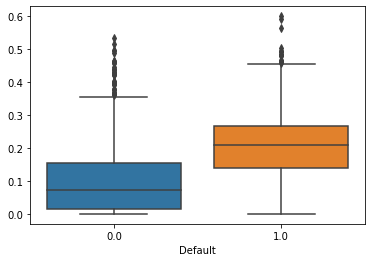

In [206]:
sns.boxplot(x=Company['default'],y=y_predict_train)
plt.xlabel('Default');

In [209]:
y_predict_train = model_1.predict(X_train)
y_predict_train

3221    1.646962e-06
2699    5.653237e-03
881     2.189721e-01
100     3.263247e-01
867     1.505901e-01
            ...     
736     4.245469e-01
826     1.493755e-03
1497    4.616521e-03
327     1.747404e-01
2969    3.805452e-07
Length: 2402, dtype: float64

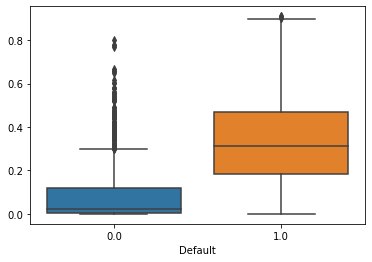

In [210]:
sns.boxplot(x=Company['default'],y=y_predict_train)
plt.xlabel('Default');

In [211]:
y_class_pred=[]
for i in range(0,len(y_predict_train)):
    if np.array(y_predict_train)[i]>0.07:
        a=1
    else:
        a=0
    y_class_pred.append(a)

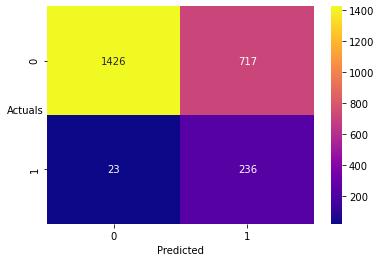

In [212]:
#print(metrics.confusion_matrix(y_test, y_predict))
sns.heatmap((metrics.confusion_matrix(y_train,y_class_pred)),annot=True,fmt='.5g'
            ,cmap='plasma');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [214]:
tn, fp, fn, tp = metrics.confusion_matrix(y_train,y_class_pred).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp)

True Negative: 1426 
False Positives: 717 
False Negatives: 23 
True Positives: 236


In [215]:
print(metrics.classification_report(y_train,y_class_pred,digits=3))

              precision    recall  f1-score   support

         0.0      0.984     0.665     0.794      2143
         1.0      0.248     0.911     0.389       259

    accuracy                          0.692      2402
   macro avg      0.616     0.788     0.592      2402
weighted avg      0.905     0.692     0.750      2402



In [216]:
y_predict_test = model_2.predict(X_test)
y_predict_test

251     0.165494
3493    0.056405
3062    0.114320
2383    0.165949
1678    0.011494
          ...   
1320    0.020818
2665    0.151555
772     0.249593
3488    0.113521
2955    0.106886
Length: 1184, dtype: float64

In [217]:
y_class_pred=[]
for i in range(0,len(y_predict_test)):
    if np.array(y_predict_test)[i]>0.07:
        a=1
    else:
        a=0
    y_class_pred.append(a)

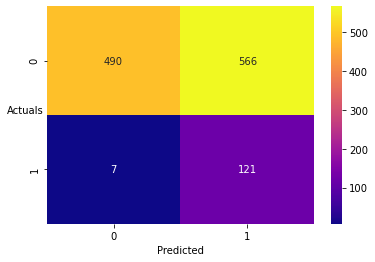

In [218]:
#print(metrics.confusion_matrix(y_test, y_predict))
sns.heatmap((metrics.confusion_matrix(y_test,y_class_pred)),annot=True,fmt='.5g'
            ,cmap='plasma');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [219]:
tn, fp, fn, tp = metrics.confusion_matrix(y_test,y_class_pred).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp)

True Negative: 490 
False Positives: 566 
False Negatives: 7 
True Positives: 121


In [220]:
print(metrics.classification_report(y_test,y_class_pred,digits=3))

              precision    recall  f1-score   support

         0.0      0.986     0.464     0.631      1056
         1.0      0.176     0.945     0.297       128

    accuracy                          0.516      1184
   macro avg      0.581     0.705     0.464      1184
weighted avg      0.898     0.516     0.595      1184



In [153]:
f_2 = 'default ~ Current_Ratio_Latest + Creditors_Velocity_Days + Inventory_Ratio_Latest + Inventory_Velocity_Days + Debtors_Ratio_Latest + Debtors_Velocity_Days + Interest_Cover_Ratio_Latest + Co_Code + Cash_Flow_From_Financing_Activities' 

In [154]:
model_2 = SM.logit(formula = f_2, data=Company_train).fit()

Optimization terminated successfully.
         Current function value: 0.285340
         Iterations 10


In [156]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2392
Method:                           MLE   Df Model:                            9
Date:                Sun, 13 Feb 2022   Pseudo R-squ.:                  0.1655
Time:                        13:36:32   Log-Likelihood:                -685.39
converged:                       True   LL-Null:                       -821.36
Covariance Type:            nonrobust   LLR p-value:                 2.295e-53
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -1.0909      0.132     -8.245      0.000      -1.350      -0.832
Current_Ratio_Latest                   -0.0617      0.011     -5.755      0.000      -0.083      -0.041
Creditors_Velocity_Days                 0.0017      0.000      5.083      0.000       0.001       0.002
Inventory_Ratio_Latest                 -0.0099      0.005     -1.977      0.048      -0.020   -8.38e-05
Inventory_Velocity_Days                -0.0013      0.001     -1.556      0.120      -0.003       0.000
Debtors_Ratio_Latest                   -0.0119      0.007     -1.812      0.070      -0.025       0.001
Debtors_Velocity_Days                  -0.0006      0.000     -1.653      0.098      -0.001       0.000
Interest_Cover_Ratio_Latest            -0.0830      0.018     -4.542      0.000      -0.119      -0.047
Co_Code                             -3.366e-05   5.73e-06     -5.873      0.000   -4.49e-05   -2.24e-05
Cash_Flow_From_Financing_Activities     0.0022      0.001      1.554      0.120      -0.001       0.005
=======================================================================================================
"""

In [157]:
calc_vif(X_train[['Current_Ratio_Latest', 'Creditors_Velocity_Days', 'Inventory_Ratio_Latest', 'Inventory_Velocity_Days', 'Debtors_Ratio_Latest', 'Debtors_Velocity_Days', 'Interest_Cover_Ratio_Latest', 'Co_Code', 'Cash_Flow_From_Financing_Activities']]).sort_values(by='VIF', ascending = True)

variables       VIF
8  Cash_Flow_From_Financing_Activities  1.124181
0                 Current_Ratio_Latest  1.193746
6          Interest_Cover_Ratio_Latest  1.235255
2               Inventory_Ratio_Latest  1.353612
3              Inventory_Velocity_Days  1.363517
4                 Debtors_Ratio_Latest  1.401455
7                              Co_Code  1.413544
1              Creditors_Velocity_Days  1.459169
5                Debtors_Velocity_Days  1.541698

In [158]:
print('The adjusted pseudo R-square value is',1 - ((model_2.llf - model_2.df_model)/model_2.llnull))

The adjusted pseudo R-square value is 0.15458798147006647


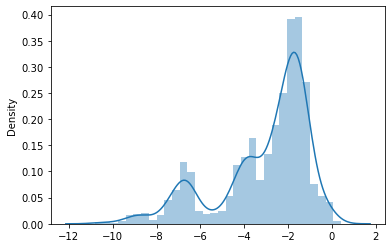

In [159]:
sns.distplot(model_2.fittedvalues);

In [160]:
y_predict_train = model_2.predict(X_train)
y_predict_train

3221    0.099337
2699    0.076660
881     0.185231
100     0.079349
867     0.127927
          ...   
736     0.464365
826     0.002600
1497    0.010718
327     0.135791
2969    0.001452
Length: 2402, dtype: float64

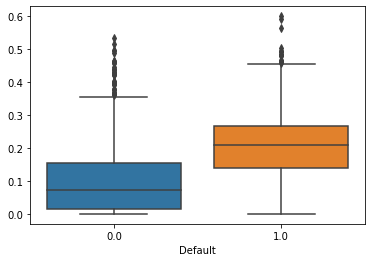

In [161]:
sns.boxplot(x=Company['default'],y=y_predict_train)
plt.xlabel('Default');

In [162]:
y_class_pred=[]
for i in range(0,len(y_predict_train)):
    if np.array(y_predict_train)[i]>0.07:
        a=1
    else:
        a=0
    y_class_pred.append(a)

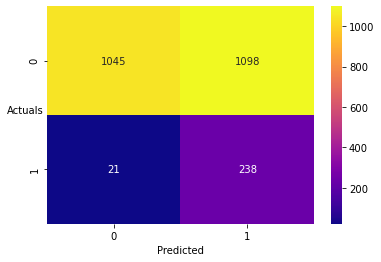

In [163]:
#print(metrics.confusion_matrix(y_test, y_predict))
sns.heatmap((metrics.confusion_matrix(y_train,y_class_pred)),annot=True,fmt='.5g'
            ,cmap='plasma');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [165]:
tn, fp, fn, tp = metrics.confusion_matrix(y_train,y_class_pred).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp)

True Negative: 1045 
False Positives: 1098 
False Negatives: 21 
True Positives: 238


In [166]:
print(metrics.classification_report(y_train,y_class_pred,digits=3))

              precision    recall  f1-score   support

         0.0      0.980     0.488     0.651      2143
         1.0      0.178     0.919     0.298       259

    accuracy                          0.534      2402
   macro avg      0.579     0.703     0.475      2402
weighted avg      0.894     0.534     0.613      2402



In [167]:
y_predict_test = model_2.predict(X_test)
y_predict_test

251     0.165494
3493    0.056405
3062    0.114320
2383    0.165949
1678    0.011494
          ...   
1320    0.020818
2665    0.151555
772     0.249593
3488    0.113521
2955    0.106886
Length: 1184, dtype: float64

In [168]:
y_class_pred=[]
for i in range(0,len(y_predict_test)):
    if np.array(y_predict_test)[i]>0.07:
        a=1
    else:
        a=0
    y_class_pred.append(a)

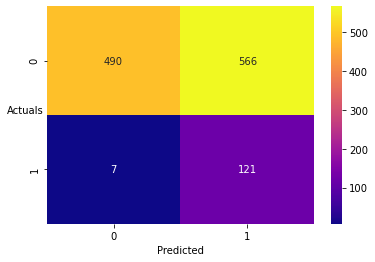

In [169]:
#print(metrics.confusion_matrix(y_test, y_predict))
sns.heatmap((metrics.confusion_matrix(y_test,y_class_pred)),annot=True,fmt='.5g'
            ,cmap='plasma');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [170]:
tn, fp, fn, tp = metrics.confusion_matrix(y_test,y_class_pred).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp)

True Negative: 490 
False Positives: 566 
False Negatives: 7 
True Positives: 121


In [171]:
print(metrics.classification_report(y_test,y_class_pred,digits=3))

              precision    recall  f1-score   support

         0.0      0.986     0.464     0.631      1056
         1.0      0.176     0.945     0.297       128

    accuracy                          0.516      1184
   macro avg      0.581     0.705     0.464      1184
weighted avg      0.898     0.516     0.595      1184



In [172]:
y_class_pred=[]
for i in range(0,len(y_predict_train)):
    if np.array(y_predict_train)[i]>0.08:
        a=1
    else:
        a=0
    y_class_pred.append(a)

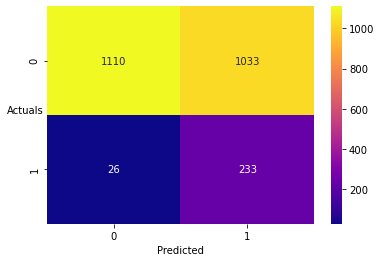

In [173]:
#print(metrics.confusion_matrix(y_test, y_predict))
sns.heatmap((metrics.confusion_matrix(y_train,y_class_pred)),annot=True,fmt='.5g'
            ,cmap='plasma');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [174]:
tn, fp, fn, tp = metrics.confusion_matrix(y_train,y_class_pred).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp)

True Negative: 1110 
False Positives: 1033 
False Negatives: 26 
True Positives: 233


In [175]:
print(metrics.classification_report(y_train,y_class_pred,digits=3))

              precision    recall  f1-score   support

         0.0      0.977     0.518     0.677      2143
         1.0      0.184     0.900     0.306       259

    accuracy                          0.559      2402
   macro avg      0.581     0.709     0.491      2402
weighted avg      0.892     0.559     0.637      2402



In [176]:
y_predict_test = model_2.predict(X_test)
y_predict_test

251     0.165494
3493    0.056405
3062    0.114320
2383    0.165949
1678    0.011494
          ...   
1320    0.020818
2665    0.151555
772     0.249593
3488    0.113521
2955    0.106886
Length: 1184, dtype: float64

In [177]:
y_class_pred=[]
for i in range(0,len(y_predict_test)):
    if np.array(y_predict_test)[i]>0.08:
        a=1
    else:
        a=0
    y_class_pred.append(a)

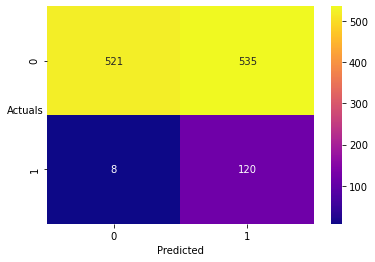

In [178]:
#print(metrics.confusion_matrix(y_test, y_predict))
sns.heatmap((metrics.confusion_matrix(y_test,y_class_pred)),annot=True,fmt='.5g'
            ,cmap='plasma');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [179]:
tn, fp, fn, tp = metrics.confusion_matrix(y_test,y_class_pred).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp)

True Negative: 521 
False Positives: 535 
False Negatives: 8 
True Positives: 120


In [180]:
print(metrics.classification_report(y_test,y_class_pred,digits=3))

              precision    recall  f1-score   support

         0.0      0.985     0.493     0.657      1056
         1.0      0.183     0.938     0.307       128

    accuracy                          0.541      1184
   macro avg      0.584     0.715     0.482      1184
weighted avg      0.898     0.541     0.619      1184



# Linear Discriminant Analysis

In [181]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier

In [182]:
LDA = LinearDiscriminantAnalysis()

In [183]:
lda_model = LDA.fit(X_train, y_train)

In [184]:
pred_train_lda = lda_model.predict(X_train)
pred_test_lda = lda_model.predict(X_test)

In [185]:
print(metrics.classification_report(y_train, pred_train_lda))

              precision    recall  f1-score   support

         0.0       0.93      0.98      0.95      2143
         1.0       0.71      0.37      0.49       259

    accuracy                           0.92      2402
   macro avg       0.82      0.68      0.72      2402
weighted avg       0.90      0.92      0.90      2402



In [186]:
print(metrics.classification_report(y_test, pred_test_lda))

              precision    recall  f1-score   support

         0.0       0.93      0.98      0.95      1056
         1.0       0.70      0.39      0.50       128

    accuracy                           0.92      1184
   macro avg       0.82      0.69      0.73      1184
weighted avg       0.91      0.92      0.91      1184



In [187]:
pred_train_lda_prob = lda_model.predict_proba(X_train)[:,1]
pred_test_lda_prob = lda_model.predict_proba(X_test)[:,1]

In [189]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train,pred_train_lda_prob)

In [190]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.11402317427032772

In [191]:
y_class_pred=[]
for i in range(0,len(pred_train_lda_prob)):
    if np.array(pred_train_lda_prob)[i]>0.28:
        a=1
    else:
        a=0
    y_class_pred.append(a)

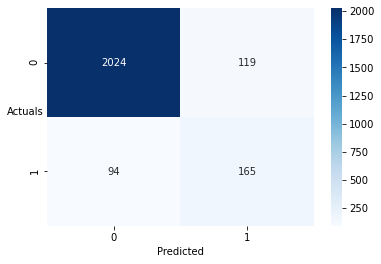

In [192]:
sns.heatmap((metrics.confusion_matrix(y_train,y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [193]:
print(metrics.classification_report(y_train, y_class_pred,digits=3))

              precision    recall  f1-score   support

         0.0      0.956     0.944     0.950      2143
         1.0      0.581     0.637     0.608       259

    accuracy                          0.911      2402
   macro avg      0.768     0.791     0.779      2402
weighted avg      0.915     0.911     0.913      2402



In [194]:
y_class_pred=[]
for i in range(0,len(pred_test_lda_prob)):
    if np.array(pred_test_lda_prob)[i]>0.28:
        a=1
    else:
        a=0
    y_class_pred.append(a)

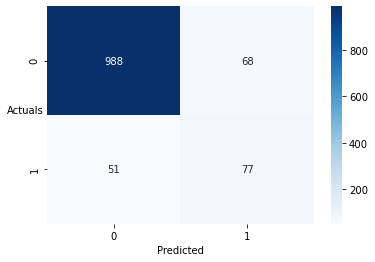

In [195]:
sns.heatmap((metrics.confusion_matrix(y_test, y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [196]:
print(metrics.classification_report(y_test, y_class_pred,digits=3))

              precision    recall  f1-score   support

         0.0      0.951     0.936     0.943      1056
         1.0      0.531     0.602     0.564       128

    accuracy                          0.899      1184
   macro avg      0.741     0.769     0.754      1184
weighted avg      0.906     0.899     0.902      1184



# Random Forest Classifier

In [197]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_leaf': [5, 10, 15],
    'min_samples_split': [15, 30, 45],
    'n_estimators': [25, 50]
}

rfcl = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid)

In [198]:
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 7],
                         'min_samples_leaf': [5, 10, 15],
                         'min_samples_split': [15, 30, 45],
                         'n_estimators': [25, 50]})

In [199]:
grid_search.best_params_

{'max_depth': 5,
 'min_samples_leaf': 10,
 'min_samples_split': 15,
 'n_estimators': 50}

In [200]:
best_grid = grid_search.best_estimator_

In [201]:
pred_train_rf = best_grid.predict(X_train)
pred_test_rf = best_grid.predict(X_test)

In [202]:
print(metrics.classification_report(y_train, pred_train_rf))

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      2143
         1.0       0.93      0.89      0.91       259

    accuracy                           0.98      2402
   macro avg       0.96      0.94      0.95      2402
weighted avg       0.98      0.98      0.98      2402



In [203]:
print(metrics.classification_report(y_test, pred_test_rf))

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      1056
         1.0       0.90      0.87      0.88       128

    accuracy                           0.98      1184
   macro avg       0.94      0.93      0.94      1184
weighted avg       0.98      0.98      0.98      1184

